In [132]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import pycaret
from pycaret.classification import *
#from pandas_profiling import ProfileReport
#import sweetviz as sv
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score,confusion_matrix
import time
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)

### *Descripción de las variables*

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

#### Importación de los csv

In [133]:
predicted= pd.read_csv(r'SubmissionFormat.csv')
traininglabels=pd.read_csv(r'0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
test=pd.read_csv(r'702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')
trainingvalues=pd.read_csv(r'4910797b-ee55-40a7-8668-10efd5c1b960.csv')
# Configuración para mostrar arrays completos
np.set_printoptions(threshold=np.inf)



### Información basica acerca de los csv

In [134]:
traininglabels.info()
test.info()
trainingvalues.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13980 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null 

In [135]:
traininglabels.dtypes
trainingvalues.dtypes


id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

### Transformación de la variable objetivo.

In [136]:
# Merge de los dos dataframe training values y training labels.
df_prueba = pd.merge(trainingvalues, traininglabels, on='id', how='left')

# Transformación en una variable numérica. 
df_prueba['status_group'] = df_prueba['status_group'].replace({'functional': 1, 'non functional': 2,'functional needs repair':3})

df_prueba.describe()
df_prueba.isnull()

    

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59396,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59397,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
59398,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Justificación sobre el no balanceo de clases

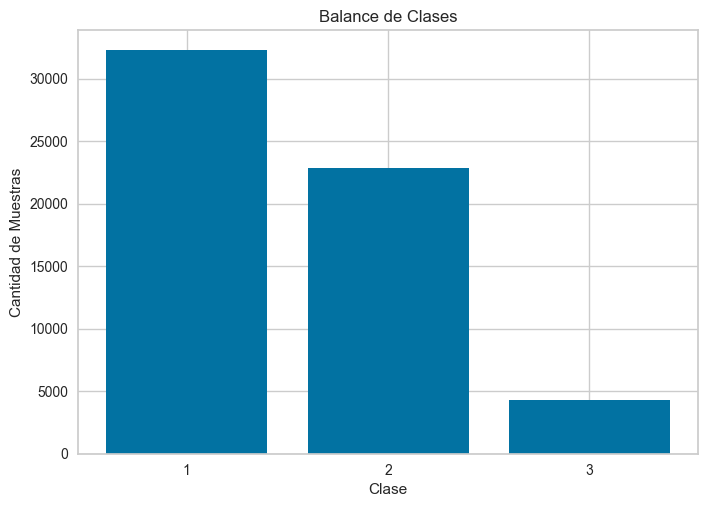

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.122896
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.003367
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.528620
scheme_name              48.501684
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

In [137]:
# Contar la cantidad de muestras por clase
class_counts = df_prueba['status_group'].value_counts().sort_index()

# Visualizar el balance de clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Clase")
plt.ylabel("Cantidad de Muestras")
plt.xticks(class_counts.index)
plt.title("Balance de Clases")
plt.show()
df_prueba.info()
df_prueba.apply(lambda x: x.isna().sum()/df_prueba.shape[0]*100)

DataFrame balanceado creado con éxito


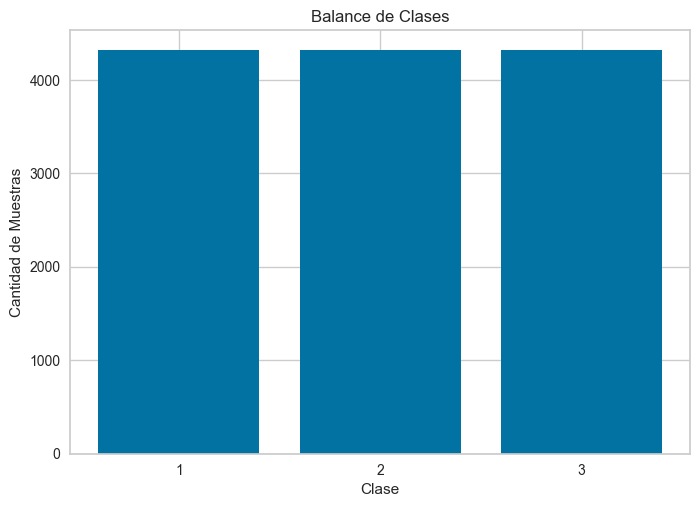

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12951 entries, 0 to 12950
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12951 non-null  int64  
 1   amount_tsh             12951 non-null  float64
 2   date_recorded          12951 non-null  object 
 3   funder                 12012 non-null  object 
 4   gps_height             12951 non-null  int64  
 5   installer              12011 non-null  object 
 6   longitude              12951 non-null  float64
 7   latitude               12951 non-null  float64
 8   wpt_name               12951 non-null  object 
 9   num_private            12951 non-null  int64  
 10  basin                  12951 non-null  object 
 11  subvillage             12902 non-null  object 
 12  region                 12951 non-null  object 
 13  region_code            12951 non-null  int64  
 14  district_code          12951 non-null  int64  
 15  lg

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
39131,74247,50.0,2013-02-16,Mission,965,DWE,35.432998,-10.63927,Kwa Mapunda,0,Ruvuma / Southern Coast,Mpakani,Ruvuma,10,2,Songea Rural,Maposeni,900,True,GeoData Consultants Ltd,VWC,Mradi wa maji wa peramiho,True,2009,other,other,other,vwc,user-group,pay per bucket,per bucket,soft,good,dry,dry,river,river/lake,surface,communal standpipe,communal standpipe,2


In [138]:
import pandas as pd
from sklearn.utils import resample

# Supongamos que df_left es tu DataFrame y 'target' es la variable objetivo

# Dividir el DataFrame en grupos por la variable objetivo
df_class_1 = df_prueba[df_prueba['status_group'] == 1]
df_class_2 = df_prueba[df_prueba['status_group'] == 2]
df_class_3 = df_prueba[df_prueba['status_group'] == 3]

# Determinar el tamaño de la clase minoritaria (clase 3)
class_3_size = len(df_class_3)

# Resamplear las clases mayoritarias
df_class_1_upsampled = resample(df_class_1,
                                replace=False, # No con reemplazo
                                n_samples=class_3_size, # Igualar el número de muestras
                                random_state=123) # Para reproducibilidad

df_class_2_upsampled = resample(df_class_2,
                                replace=False, # No con reemplazo
                                n_samples=class_3_size, # Igualar el número de muestras
                                random_state=123) # Para reproducibilidad

# Combinar los grupos balanceados
df_balanced = pd.concat([df_class_1_upsampled, df_class_2_upsampled, df_class_3])

# Mezclar el DataFrame balanceado para asegurar aleatoriedad
df_balanced = df_balanced.sample(frac=1, random_state=123).reset_index(drop=True)

print("DataFrame balanceado creado con éxito")

# Contar la cantidad de muestras por clase
class_counts = df_balanced['status_group'].value_counts().sort_index()

# Visualizar el balance de clases
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Clase")
plt.ylabel("Cantidad de Muestras")
plt.xticks(class_counts.index)
plt.title("Balance de Clases")
plt.show()
class_counts
df_balanced.info()

# Mostrar el último dato del DataFrame
df_prueba=df_prueba.sort_values(by='id',ascending=True)
df_prueba.tail(1)


Tal y como podemos observar hay desbalanceo en la muestra puesto que hay una menor cantidad de datos de la variable cuando toma el valor 3. He optado por no  realizar un rebalanceo de la muestra puesto que Cuando hacía un over-sampling o un under-sampling, el modelo final me salía con una menor capacidad de predicción, quizás con una mayor muestra o una muestra claremente desbalanceada podría haber mejorado el modelo. En el caso del over-sampling esta reducción de la capacidad de predicción puede ser debida a que al duplicar ejemplos de la clase minoritaria o generar ejemplos sintéticos (como con SMOTE), el modelo puede volverse demasiado dependiente de estos datos duplicados o sintéticos. Esto puede llevar a que el modelo aprenda detalles específicos de los ejemplos en lugar de generalizar patrones, lo que reduce su capacidad para manejar nuevos datos no vistos. Por otro lado, con el under-sampling, al reducir el número de ejemplos de la clase mayoritaria, puedes eliminar ejemplos valiosos que contienen información importante. Esto puede llevar a un modelo que no captura bien la complejidad de la clase mayoritaria, lo que resulta en un rendimiento general peor.

La capacidad de predicción en la página web me salía 0.699 frente al 0.8086 que conseguía con el modelo sin rebalanceo. No obstante, es importante que las muestras estén balanceadas puesto que en caso contrario podria tener mucha facilidad para interpretar los valores de una variable y que cuando tomase otro valor distinto al sobrerepresentado presentase grandes problemas de estimación debido a que no ha tenido una gran muestra  en los datos.

### Añadir una columna para diferenciar entre prueba y test

In [139]:

# Añadir una columna de indicador para identificar de dónde viene cada fila
df_prueba['is_test'] = 0  # Marcamos con 0 los datos de prueba
test['is_test'] = 1    # Marcamos con 1 los datos de test

# Concatenar los dataframes, uno debajo del otro
df_left = pd.concat([df_prueba, test], axis=0)  # axis=0 para concatenar filas


### Análisis de las variables.

##### Reporte estadístico

In [140]:
# Reporte y análisis con la librería sweetviz. 
#report = sv.analyze(df_left)
df_left.describe()
# Guardar el reporte en un archivo HTML
#report.show_html("reporte_sweetviz.html")


,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group,is_test
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,59400.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650,1.529596,0.200000
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375,0.628080,0.400003
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,1.000000,0.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,2.000000,0.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,3.000000,1.000000


##### Visualizar los nulos

In [141]:
df_left.apply(lambda x: x.isna().sum()/df_left.shape[0]*100)


id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.070034
gps_height                0.000000
installer                 6.103704
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.002694
num_private               0.000000
basin                     0.000000
subvillage                0.632997
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.595960
recorded_by               0.000000
scheme_management         6.527946
scheme_name              48.554882
permit                    5.108418
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

##### Histograma y gráfico de caja para la obtención de outliers en las variables numéricas y posibles cambios en las mismas.

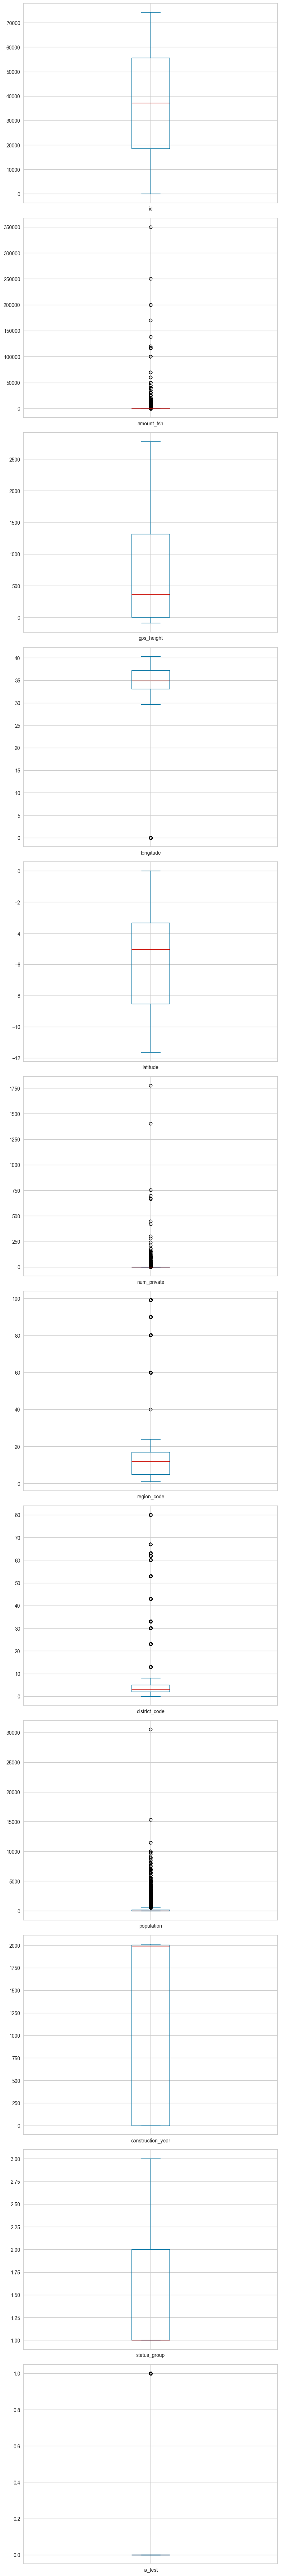

In [142]:
import matplotlib.pyplot as plt

# Selección de columnas numéricas.
numeric_cols = df_left.select_dtypes(include=np.number).columns

# Crear un boxplot para cada columna numérica.
df_left[numeric_cols].plot(kind='box', subplots=True, layout=(len(numeric_cols), 1), figsize=(8, 6 * len(numeric_cols)), sharey=False)

# Ajustar el diseño para evitar superposición de subplots
plt.tight_layout()
plt.show()


In [143]:
df_left.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,status_group,is_test
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,59400.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650,1.529596,0.200000
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375,0.628080,0.400003
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000,1.000000,0.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,2.000000,0.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,3.000000,1.000000


Tal y como podemos observar, hay algunas variables con un gran porcentaje de nulos, luego tendremos que tratarlas a posteriori, bien haciendo una imputación aleatoria o bien realizando una imputación según la media o proporción. Por otro lado, nos encontramos variables como la altura del pozo, que toma valores negativos en la que será conveniente el quitar esos valores negativos puesto que no son demasiados y no podemos hacer gran cosa con ellos porque son o fallos de medición o fallos a la hora de guardas los datos. En cualquier caso, no nos interesa tenerlos. 

Además, tal y como podemos observar, existe un gran numero de variables con una gran cantidad de outliers. Especial hincapié en la variable population y la variable amount_tsh, las cuales tienen una gran cantidad. Debemos de desagregar estas variables para ver que les está pasando y cuales son la verdadera causa de sus outliers. Las demás variables no parecen tener demasiados problemas en este sentido. 
Más tarde, analizaremos las variables categóricas para ver que tipo de problemas tienen y ver si tienen solución o no. 

#### Variables numéricas

##### El caso de amount_tsh

Text(0.5, 1.0, 'Histograma de la cantidad de agua (amount_tsh)')

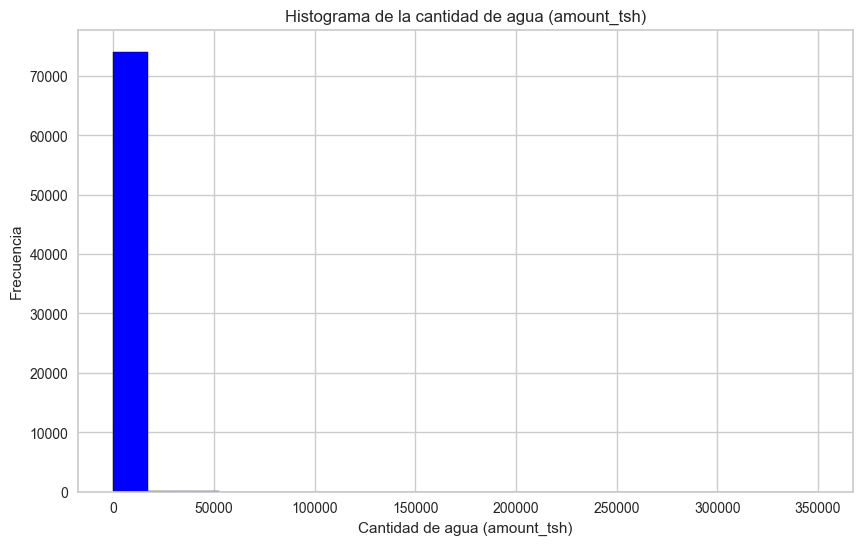

In [144]:
# Configuración del histograma
plt.figure(figsize=(10, 6))  
plt.hist(df_left['amount_tsh'], bins=20, color='blue', edgecolor='black') 
plt.xlabel('Cantidad de agua (amount_tsh)')
plt.ylabel('Frecuencia')
plt.title('Histograma de la cantidad de agua (amount_tsh)')

Estadísticas descriptivas de amount_tsh:
count     74250.000000
mean        318.685704
std        2906.762364
min           0.000000
25%           0.000000
50%           0.000000
75%          20.000000
max      350000.000000
Name: amount_tsh, dtype: float64


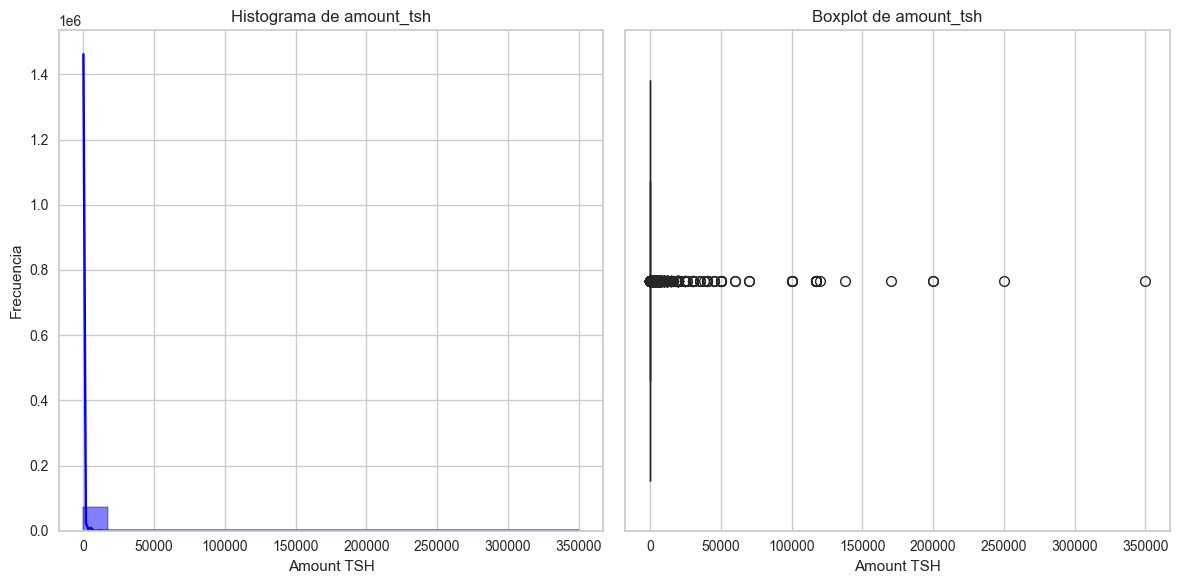

In [145]:
# Estadísticas descriptivas.
print("Estadísticas descriptivas de amount_tsh:")
print(df_left['amount_tsh'].describe())

# Histograma para visualizar la distribución.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_left['amount_tsh'], bins=20, kde=True, color='blue')
plt.title('Histograma de amount_tsh')
plt.xlabel('Amount TSH')
plt.ylabel('Frecuencia')

# Boxplot para identificar outliers y distribución.
plt.subplot(1, 2, 2)
sns.boxplot(x=df_left['amount_tsh'], color='green')
plt.title('Boxplot de amount_tsh')
plt.xlabel('Amount TSH')

plt.tight_layout()
plt.show()


In [146]:
encero=df_left[(df_left['amount_tsh']==0)].value_counts()
hasta50=df_left[(df_left['amount_tsh'] <=50)].value_counts()
entre50_500=df_left[(df_left['amount_tsh'] > 50) & (df_left['amount_tsh'] <= 500)]
mayor500=df_left[(df_left['amount_tsh'] >=500)].value_counts()

#print(encero)
print(hasta50)
#print(entre50_500)
#print(mayor500)

# Comprobación por cuartiles de distribución
q1 = df_left['amount_tsh'].quantile(0.25)
q2 = df_left['amount_tsh'].quantile(0.5)
q3 = df_left['amount_tsh'].quantile(0.75)
print(q1)
print(q2)
print(q3)

id     amount_tsh  date_recorded  funder                  gps_height  installer           longitude  latitude    wpt_name                    num_private  basin                    subvillage      region    region_code  district_code  lga           ward      population  public_meeting  recorded_by              scheme_management  scheme_name                  permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management        management_group  payment         payment_type  water_quality  quality_group  quantity      quantity_group  source       source_type  source_class  waterpoint_type              waterpoint_type_group  status_group  is_test
2      0.0         2011-03-27     Lvia                     0          LVIA                36.115056  -6.279268   Bombani                     0            Wami / Ruvu              Songambele      Dodoma    1            4              Chamwino      Msamalo   0           True            GeoData Consultants Ltd  VW

Text(0.5, 1.0, 'Histograma de amount_tsh')

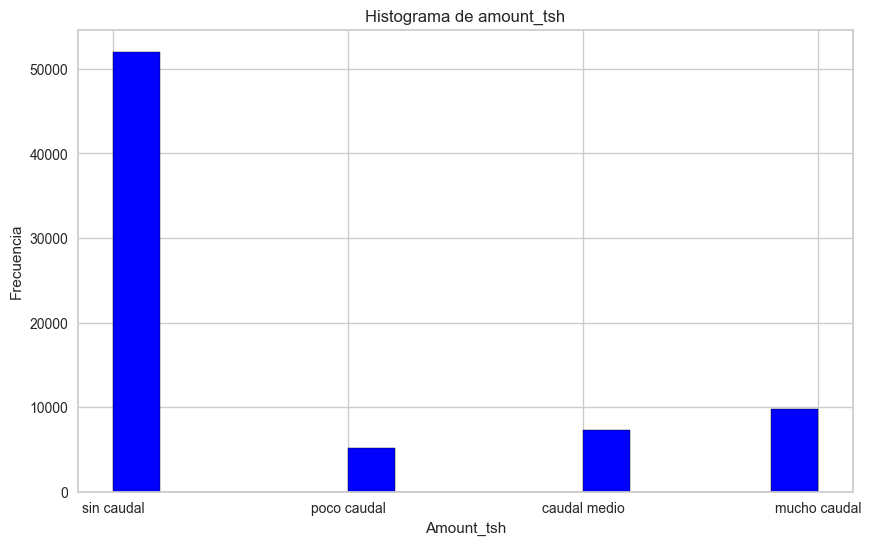

In [147]:

# Definir los intervalos y las etiquetas
intervals = [0, 1, 50, 500, float('inf')]
labels = ['sin caudal', 'poco caudal', 'caudal medio', 'mucho caudal']

# Crear la nueva columna en el DataFrame con las categorías
df_left['amount_tsh_category'] = pd.cut(df_left['amount_tsh'], bins=intervals, labels=labels, right=False)

# Mostrar el DataFrame para verificar
df_left.sort_values(by='amount_tsh',ascending= False)
# Aquí procedo a eliminar el amount_tsh
df_left=df_left.drop('amount_tsh', axis=1)

# Configuración del histograma
plt.figure(figsize=(10, 6)) 
plt.hist(df_left['amount_tsh_category'], bins=15, color='blue', edgecolor='black') 

# Etiquetas y título
plt.xlabel('Amount_tsh')
plt.ylabel('Frecuencia')
plt.title('Histograma de amount_tsh')

Una gran proporción de valores se concentran en el cero (los dos  primeros cuartiles de la distribución), luego hay otros que se concentran en otros estratos de forma que creo conveniente el hecho de categorizar la variable teniendo en cuenta las proporciones entre las distintas categorias. Esto lo hago para que la variable siga teniendo en cuenta la proporción de valores repartida a lo largo de la distribución. De ninguna manera tendría sentido el dividirla en grupos si no respetamos la representatividad de cada valor o grupo. Al grupo más frecuente, el cero, le he asignado el nombre sin caudal. A las frecuencias entre 0 y 50, poco caudal. Al caudal medio 50 y 500 de frecuencia. Por último, mucho caudal con la cual he hecho 500 o más de frecuencia. Estoy cómodo con esta distribución puesto que haciendo el análisis de la variable por frecuencia me he fijado que esta división por frecuencias es la más adecuada.

##### El caso de population

Text(0, 0.5, 'Frecuencia')

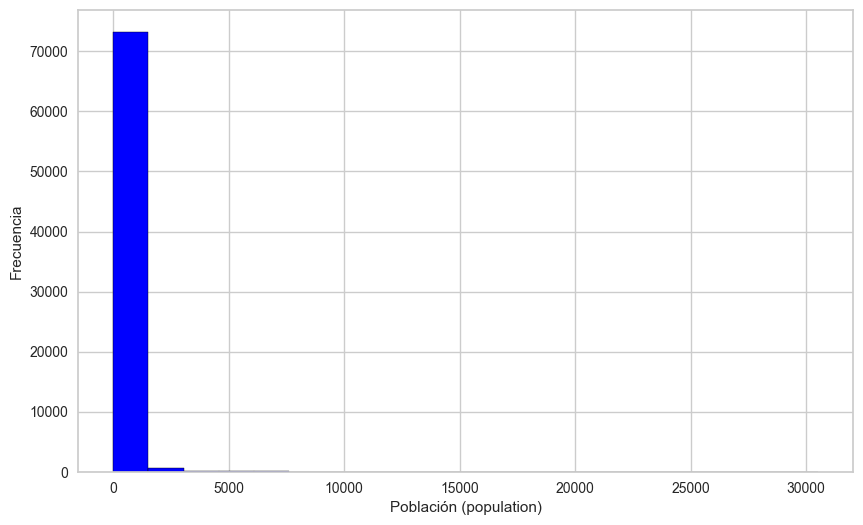

In [148]:
# Configuración del histograma
plt.figure(figsize=(10, 6))  
plt.hist(df_left['population'], bins=20, color='blue', edgecolor='black') 
plt.xlabel('Población (population)')
plt.ylabel('Frecuencia')


Estadísticas descriptivas de 'population':
count    74250.000000
mean       180.750828
std        471.086120
min          0.000000
25%          0.000000
50%         25.000000
75%        215.000000
max      30500.000000
Name: population, dtype: float64


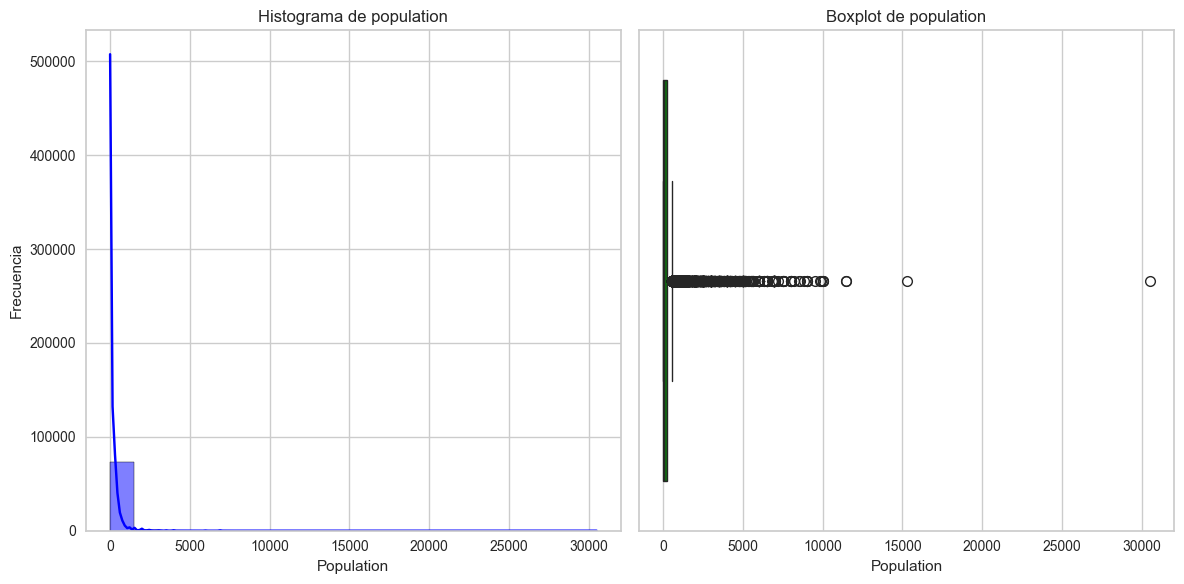

In [149]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de 'population':")
print(df_left['population'].describe())

# Histograma para visualizar la distribución
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_left['population'], bins=20, kde=True, color='blue')
plt.title('Histograma de population')
plt.xlabel('Population')
plt.ylabel('Frecuencia')

# Boxplot para identificar outliers y distribución
plt.subplot(1, 2, 2)
sns.boxplot(x=df_left['population'], color='green')
plt.title('Boxplot de population')
plt.xlabel('Population')

plt.tight_layout()
plt.show()


In [150]:
encero=df_left[(df_left['population']==0)].value_counts()
hasta20=df_left[(df_left['population'] <=20)].value_counts()
mayor221=df_left[(df_left['population'] >=221)].value_counts()

print(encero)
#print(hasta20)
#print(mayor221)

# Comprobación por cuartiles de distribución
q1 = df_left['population'].quantile(0.25)
q2 = df_left['population'].quantile(0.5)
q3 = df_left['population'].quantile(0.75)
print(q1)
print(q2)
print(q3)

id     date_recorded  funder                  gps_height  installer           longitude  latitude   wpt_name                 num_private  basin          subvillage       region     region_code  district_code  lga           ward          population  public_meeting  recorded_by              scheme_management  scheme_name                        permit  construction_year  extraction_type  extraction_type_group  extraction_type_class  management  management_group  payment                payment_type  water_quality  quality_group  quantity      quantity_group  source                source_type           source_class  waterpoint_type              waterpoint_type_group  status_group  is_test  amount_tsh_category
2      2011-03-27     Lvia                    0           LVIA                36.115056  -6.279268  Bombani                  0            Wami / Ruvu    Songambele       Dodoma     1            4              Chamwino      Msamalo       0           True            GeoData Consultants L

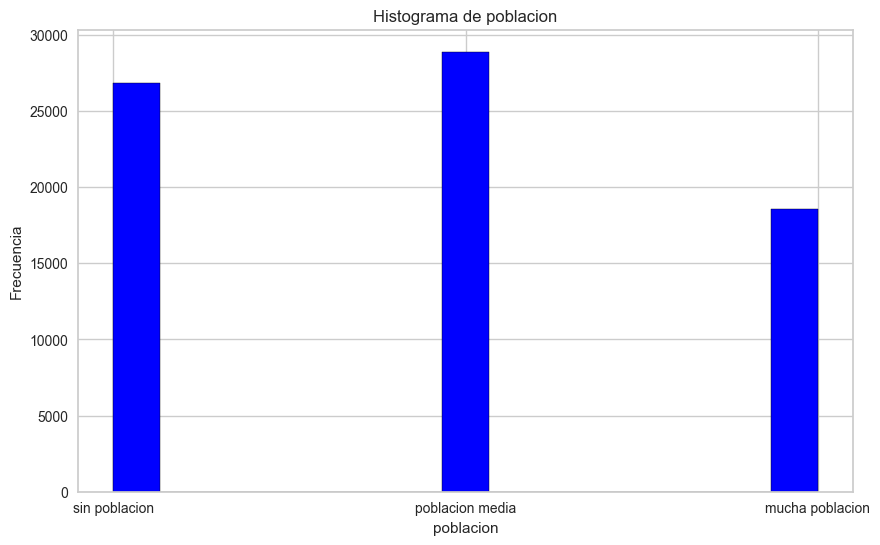

In [151]:

q1 = df_left['population'].quantile(0.25)
q3 = df_left['population'].quantile(0.75)

# Define las condiciones para clasificar en 3 grupos
def classify_population(value):
    if value <= q1:
        return 'sin poblacion'
    elif q1 < value <= q3:
        return 'poblacion media'
    else:
        return 'mucha poblacion'

# Aplica la función para crear una nueva columna con las categorías
df_left['poblacion'] = df_left['population'].apply(classify_population)


# Configuración del histograma
plt.figure(figsize=(10, 6))  
plt.hist(df_left['poblacion'], bins=15, color='blue', edgecolor='black')  

# Etiquetas y título
plt.xlabel('poblacion')
plt.ylabel('Frecuencia')
plt.title('Histograma de poblacion')
df_left=df_left.drop('population',axis=1)

El caso de la variable population es algo parecido al de la variable amount_tsh, posee una gran cantidad de valores que son cero y que por lo tanto tenemos que categorizarlos. El primer cuartil de la distribución es enteramente del cero. El segundo hasta 20 y el tercero 200. Tiene una buena presencia de outliers. Nuevamente, y como en el caso de amount_tsh, he creido conveniente el hacer una división según la representatividad de los valores, dividiendola en este caso, en tres grandes grupos: sin población, poblacion media y mucha poblacion. 'sin población', poblaciones por debajo del cuartil q1 (cero). 'poblacion media', los valores de la variable que se encuentran entre el primer y tercer cuartil. Por último, 'mucha poblacion', la frecuencia que se encuentra encima del cuartil 3. Con esta distribución respeto la preponderancia de los valores de aquellas poblaciones que no tienen población y dejo otros dos grupos repartidos entre los distintos cuartiles. 

In [152]:
num_cols = df_left.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:", num_cols)


Columnas numéricas: Index(['id', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'construction_year', 'status_group',
       'is_test'],
      dtype='object')


#### Variable categóricas

In [153]:
df_left.describe(exclude=np.number)

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh_category,poblacion
count,74250,69743,69718,74248,74250,73780,74250,74250,74250,70095,74250,69403,38198,70457,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250,74250
unique,369,2139,2410,45683,9,21425,21,125,2098,2,1,11,2867,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,4,3
top,2011-03-17,Government Of Tanzania,DWE,none,Lake Victoria,Shuleni,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,sin caudal,poblacion media
freq,695,11299,21751,4440,12871,646,6599,3128,386,63749,74250,45917,858,48606,33263,33263,33263,50624,65538,31712,31712,63505,63505,41522,41522,21216,21216,57286,35628,43239,52055,28877


La idea en este apartado es intentar reducir lo máximo posible el número de categorías dentro de las variables categóricas. 

##### Subvillage

In [154]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de 'subvillage':")
print(df_left['subvillage'].describe())




Estadísticas descriptivas de 'subvillage':
count       73780
unique      21425
top       Shuleni
freq          646
Name: subvillage, dtype: object


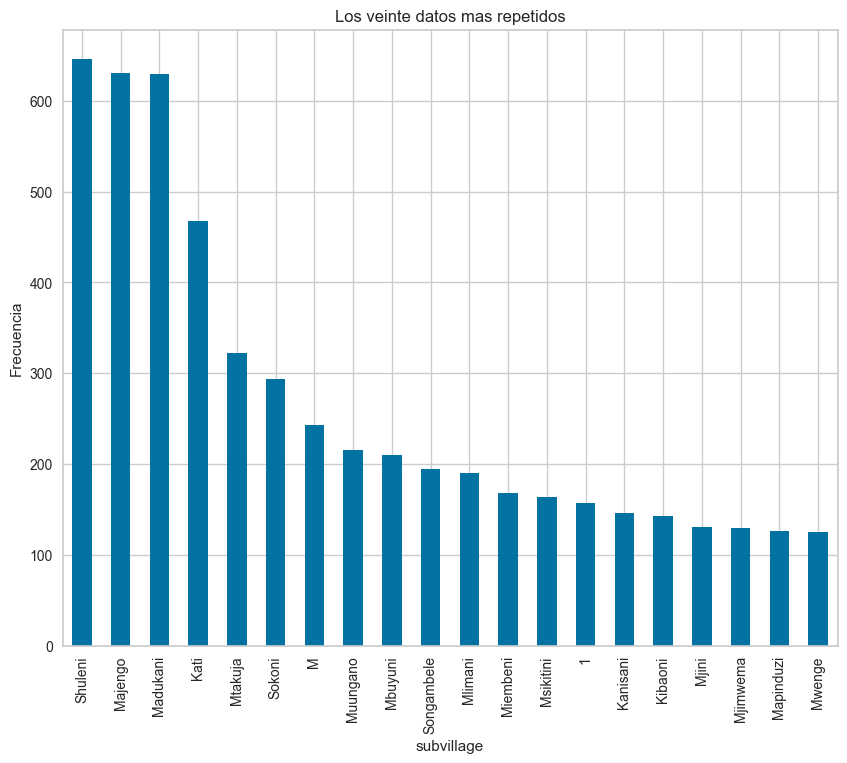

In [155]:
# Conteo de la variable subvillage
subvillage_counts = df_left['subvillage'].value_counts()

top_subvillage = subvillage_counts.head(20) 

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_subvillage.plot(kind='bar')
plt.title('Los veinte datos mas repetidos')
plt.xlabel('subvillage')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [156]:
# Conteo de frecuencia de cada categoría
subvillage_counts = df_left['subvillage'].value_counts().reset_index()
subvillage_counts.columns = ['subvillage', 'count']

# Calcular la media de las frecuencias
mean_frequency = subvillage_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")
subvillage_counts['count'].median()

Media de frecuencia: 3.4436406067677945


2.0

['S' 'M' 'T' 'L' 'U' 'I' '1' 'K' 'N' 'O' 'J' 'A' 'B' 'W' 'Q' 'C' 'G' 'F'
 'P' 'R']


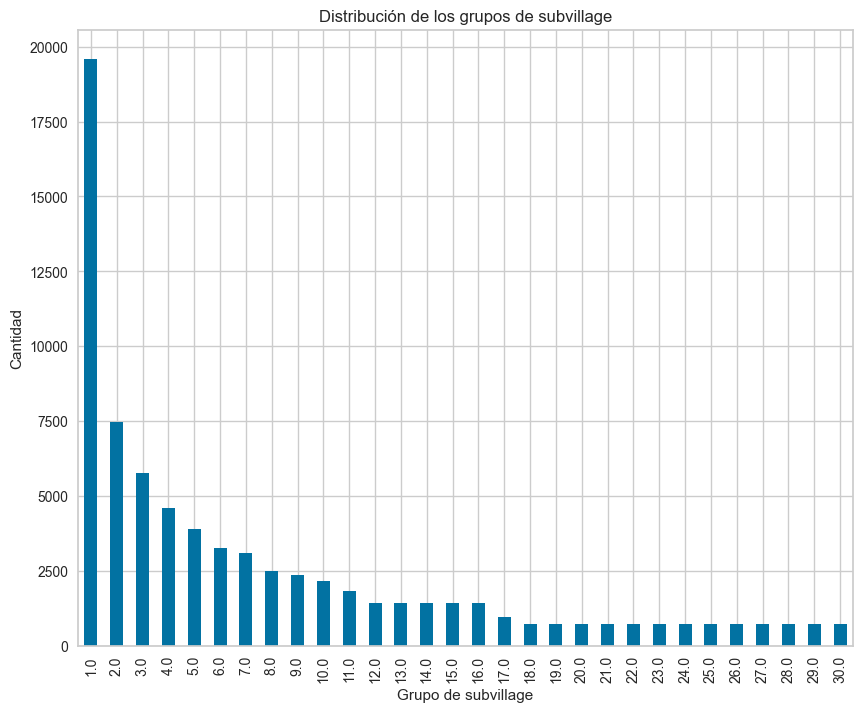

In [157]:
# Mostrar los valores únicos de subvillage con un solo carácter
subvillage_single_char = df_left[df_left['subvillage'].str.len() == 1]
print(subvillage_single_char['subvillage'].unique())

# Conteo de frecuencia de cada categoría
subvillage_counts = df_left['subvillage'].value_counts().reset_index()
subvillage_counts.columns = ['subvillage', 'count']

# Umbral para considerar un 'subvillage' como frecuente
threshold = 200

# Valores frecuentes y no frecuentes
frequent_funders = subvillage_counts[subvillage_counts['count'] >= threshold]
infrequent_funders = subvillage_counts[subvillage_counts['count'] < threshold]

# Crear etiquetas para los funders frecuentes
frequent_funders['subvillage_group'] = range(1, len(frequent_funders) + 1)

# Número de grupos para los funders no frecuentes
num_infrequent_groups = 30 

# Agrupar funders no frecuentes en grupos
infrequent_funders['subvillage_group'] = np.repeat(range(1, num_infrequent_groups + 1), 
                                               np.ceil(len(infrequent_funders) / num_infrequent_groups))[:len(infrequent_funders)]

# Unir los DataFrames de funders frecuentes y no frecuentes
all_funders = pd.concat([frequent_funders, infrequent_funders], ignore_index=True)

# Mapeamos los grupos a los datos originales
df_left = df_left.merge(all_funders[['subvillage', 'subvillage_group']], on='subvillage', how='left')

#Visualización de los resultados
plt.figure(figsize=(10, 8))
df_left['subvillage_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de los grupos de subvillage')
plt.xlabel('Grupo de subvillage')
plt.ylabel('Cantidad')
plt.show()

##### Funder

In [158]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de 'funder':")
print(df_left['funder'].describe())


Estadísticas descriptivas de 'funder':
count                      69743
unique                      2139
top       Government Of Tanzania
freq                       11299
Name: funder, dtype: object


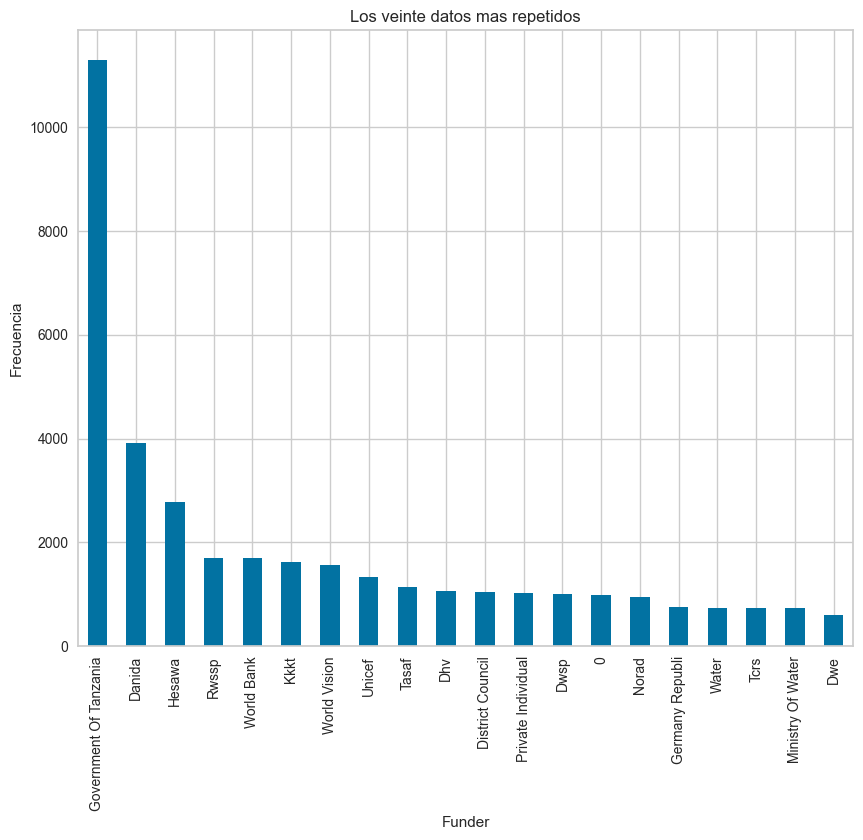

In [159]:

# Conteo de la variable funder
funder_counts = df_left['funder'].value_counts()

top_funders = funder_counts.head(20) 

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_funders.plot(kind='bar')
plt.title('Los veinte datos mas repetidos')
plt.xlabel('Funder')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [160]:
# Conteo de frecuencia de cada categoría
funder_counts = df_left['funder'].value_counts().reset_index()
funder_counts.columns = ['funder', 'count']

# Calcular la media de las frecuencias
mean_frequency = funder_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")
funder_counts['count'].median()

Media de frecuencia: 32.60542309490416


1.0

['0' 'W' 'H' 'P' 'D' 'T' 'F' 'C' 'L' 'M' 'S' 'R' 'O' 'K']


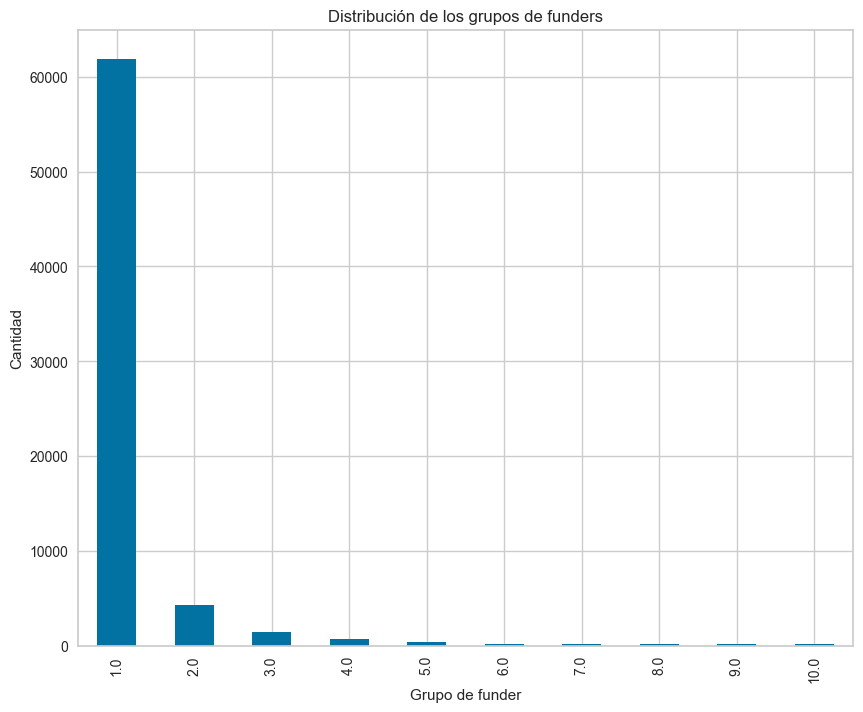

In [161]:
# Mostrar los valores únicos de funder con un solo carácter
funder_single_char = df_left[df_left['funder'].str.len() == 1]
print(funder_single_char['funder'].unique())

# Conteo de frecuencia de cada categoría
funder_counts = df_left['funder'].value_counts().reset_index()
funder_counts.columns = ['funder', 'count']

# Umbral para considerar un 'funder' como frecuente
threshold = 10000  

# Valores frecuentes y no frecuentes
frequent_funders = funder_counts[funder_counts['count'] >= threshold]
infrequent_funders = funder_counts[funder_counts['count'] < threshold]

# Crear etiquetas para los funders frecuentes
frequent_funders['funder_group'] = range(1, len(frequent_funders) + 1)

# Número de grupos para los funders no frecuentes
num_infrequent_groups = 10  

# Agrupar funders no frecuentes en grupos
infrequent_funders['funder_group'] = np.repeat(range(1, num_infrequent_groups + 1), 
                                               np.ceil(len(infrequent_funders) / num_infrequent_groups))[:len(infrequent_funders)]

# Unir los DataFrames de funders frecuentes y no frecuentes
all_funders = pd.concat([frequent_funders, infrequent_funders], ignore_index=True)

# Mapeamos los grupos a los datos originales
df_left = df_left.merge(all_funders[['funder', 'funder_group']], on='funder', how='left')

# Visualización de los resultados
plt.figure(figsize=(10, 8))
df_left['funder_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de los grupos de funders')
plt.xlabel('Grupo de funder')
plt.ylabel('Cantidad')
plt.show()

##### Installer

In [162]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de 'installer':")
print(df_left['installer'].describe())



Estadísticas descriptivas de 'installer':
count     69718
unique     2410
top         DWE
freq      21751
Name: installer, dtype: object


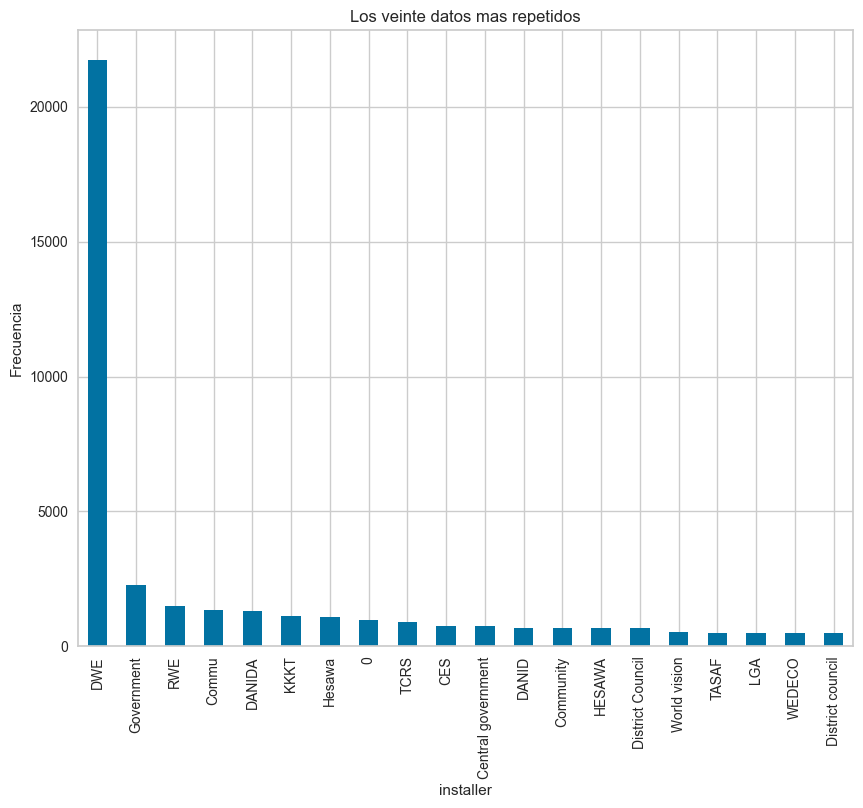

In [163]:

# Conteo de la variable installer
funder_counts = df_left['installer'].value_counts()

top_funders = funder_counts.head(20) 

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_funders.plot(kind='bar')
plt.title('Los veinte datos mas repetidos')
plt.xlabel('installer')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [164]:
# Conteo de frecuencia de cada categoría
installer_counts = df_left['installer'].value_counts().reset_index()
installer_counts.columns = ['installer', 'count']

# Mostrar las variables que tienen mayor frecuencia y su valor de frecuencia
top_installers = installer_counts.head(20)
print(top_installers)

             installer  count
0                  DWE  21751
1           Government   2282
2                  RWE   1498
3                Commu   1347
4               DANIDA   1305
5                 KKKT   1120
6               Hesawa   1070
7                    0    980
8                 TCRS    887
9                  CES    765
10  Central government    764
11               DANID    690
12           Community    687
13              HESAWA    679
14    District Council    663
15        World vision    517
16               TASAF    504
17                 LGA    501
18              WEDECO    496
19    District council    490


In [165]:
# Conteo de frecuencia de cada categoría
funder_counts = df_left['installer'].value_counts().reset_index()
funder_counts.columns = ['installer', 'count']

# Calcular la media de las frecuencias
mean_frequency = funder_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")
funder_counts['count'].median()
funder_counts['count']>=500

Media de frecuencia: 28.92863070539419


0        True
1        True
2        True
3        True
4        True
        ...  
2405    False
2406    False
2407    False
2408    False
2409    False
Name: count, Length: 2410, dtype: bool

['0' 'H' 'P' 'W' 'D' 'T' 'F' '-' 'C' 'L' 'M' 'V' 'p' 'S' 'R' 'O' 'K']


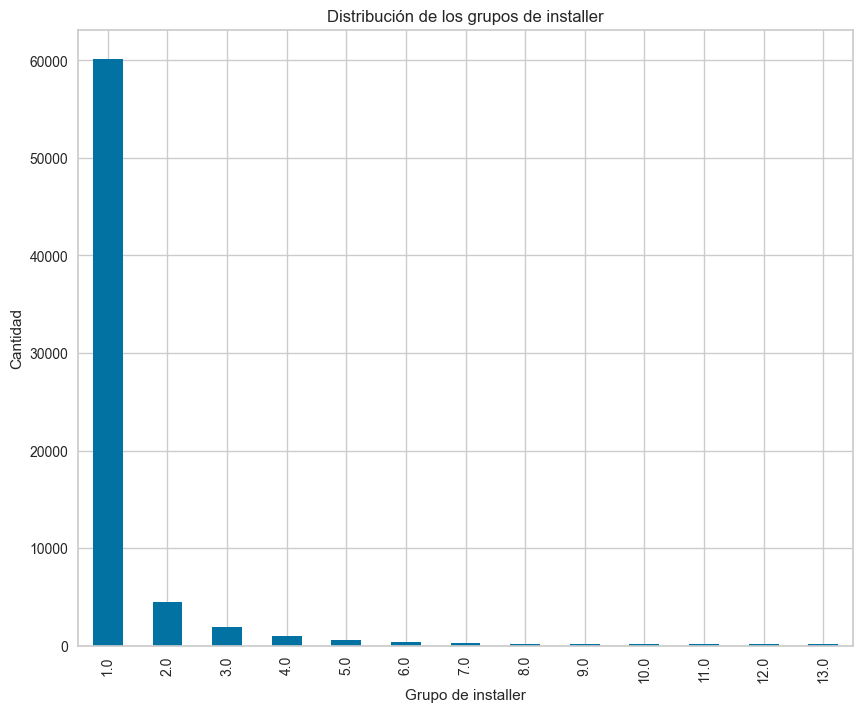

array([ 1.,  2.,  9.,  3., nan,  5.,  6., 10.,  4.,  7.,  8., 12., 13.,
       11.])

In [166]:
# Mostrar los valores únicos de installer con un solo carácter
installer_single_char = df_left[df_left['installer'].str.len() == 1]
print(installer_single_char['installer'].unique())

# Conteo de frecuencia de cada categoría
installer_counts = df_left['installer'].value_counts().reset_index()
installer_counts.columns = ['installer', 'count']

# Umbral para considerar un 'installer' como frecuente basado en la media
threshold = 20000  

# Valores frecuentes y no frecuentes
frequent_installers = installer_counts[installer_counts['count'] >= threshold]
infrequent_installers = installer_counts[installer_counts['count'] < threshold]

# Crear etiquetas para los installers frecuentes
frequent_installers['installer_group'] = range(1, len(frequent_installers) + 1)

# Número de grupos para los installers no frecuentes
num_infrequent_groups = 13  

# Agrupar installers no frecuentes en grupos
infrequent_installers['installer_group'] = np.repeat(
    range(1, num_infrequent_groups + 1), 
    np.ceil(len(infrequent_installers) / num_infrequent_groups)
)[:len(infrequent_installers)]

# Unir los DataFrames de installers frecuentes y no frecuentes
all_installers = pd.concat([frequent_installers, infrequent_installers], ignore_index=True)

# Mapeamos los grupos a los datos originales
df_left = df_left.merge(all_installers[['installer', 'installer_group']], on='installer', how='left')

# Visualización de los resultados
plt.figure(figsize=(10, 8))
df_left['installer_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de los grupos de installer')
plt.xlabel('Grupo de installer')
plt.ylabel('Cantidad')
plt.show()
df_left['installer_group'].unique()

##### Wpt_name

In [167]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de wpt_name:")
print(df_left['wpt_name'].describe())



Estadísticas descriptivas de wpt_name:
count     74248
unique    45683
top        none
freq       4440
Name: wpt_name, dtype: object


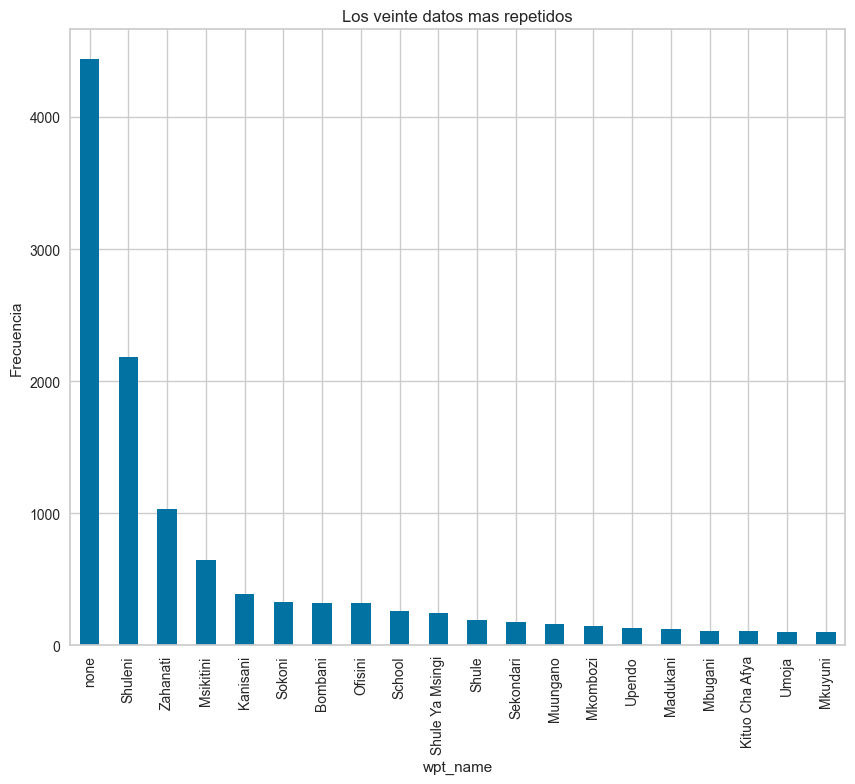

In [168]:
# Conteo de la variable wpt_name
funder_counts = df_left['wpt_name'].value_counts()

top_funders = funder_counts.head(20) 

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_funders.plot(kind='bar')
plt.title('Los veinte datos mas repetidos')
plt.xlabel('wpt_name')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [169]:
# Conteo de frecuencia de cada categoría
installer_counts = df_left['wpt_name'].value_counts().reset_index()
installer_counts.columns = ['wpt_name', 'count']

# Mostrar las variables que tienen mayor frecuencia y su valor de frecuencia
top_installers = installer_counts.head(30)
print(top_installers)

           wpt_name  count
0              none   4440
1           Shuleni   2183
2          Zahanati   1034
3         Msikitini    647
4          Kanisani    390
5            Sokoni    328
6           Bombani    323
7           Ofisini    321
8            School    260
9   Shule Ya Msingi    247
10            Shule    191
11        Sekondari    178
12         Muungano    159
13         Mkombozi    145
14           Upendo    130
15         Madukani    128
16          Mbugani    113
17   Kituo Cha Afya    113
18            Umoja    105
19          Mkuyuni    103
20         Hospital    100
21           Center    100
22         Kisimani     97
23              Ccm     95
24          Mtakuja     91
25       Songambele     90
26  Ofisi Ya Kijiji     89
27          Bwawani     86
28          Tankini     82
29          Bondeni     80


In [170]:
# Conteo de frecuencia de cada categoría
funder_counts = df_left['wpt_name'].value_counts().reset_index()
funder_counts.columns = ['wpt_name', 'count']

# Calcular la media de las frecuencias
mean_frequency = funder_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")
funder_counts['count'].median()


Media de frecuencia: 1.6252873060000437


1.0

['M' 'X' 'K' 'G' 'S' 'R' 'B' 'T']
Media de frecuencia: 1.6252873060000437


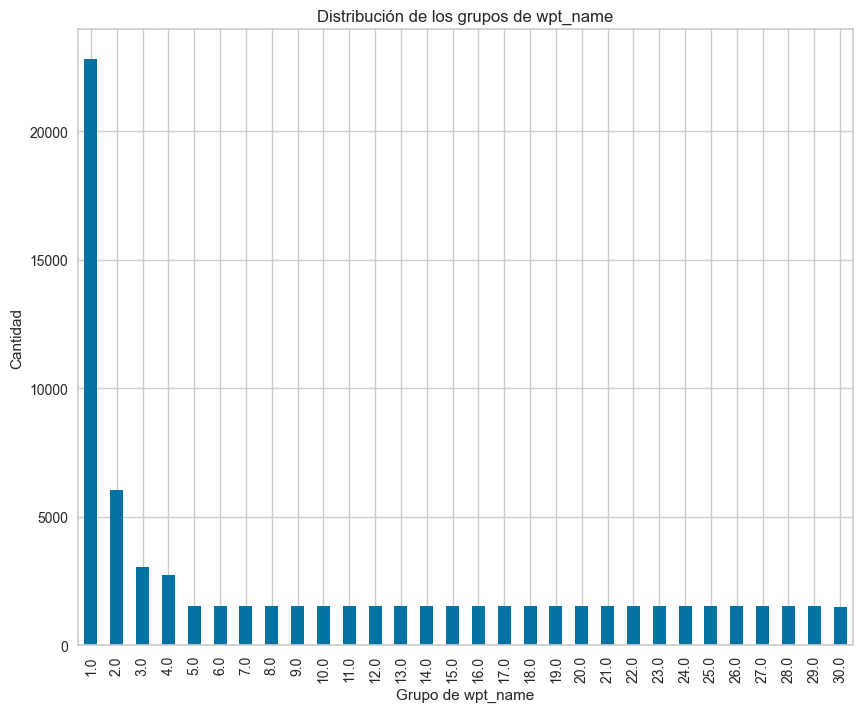

    wpt_name  count
0       none   4440
1    Shuleni   2183
2   Zahanati   1034
3  Msikitini    647
4   Kanisani    390


In [171]:
# Mostrar los valores únicos de wpt_name con un solo carácter
wpt_name_single_char = df_left[df_left['wpt_name'].str.len() == 1]
print(wpt_name_single_char['wpt_name'].unique())

# Conteo de frecuencia de cada categoría
wpt_name_counts = df_left['wpt_name'].value_counts().reset_index()
wpt_name_counts.columns = ['wpt_name', 'count']

# Calcular la media de las frecuencias
mean_frequency = wpt_name_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")

# Umbral para considerar un 'wpt_name' como frecuente basado en la media
threshold = 2000

# Valores frecuentes y no frecuentes
frequent_wpt_names = wpt_name_counts[wpt_name_counts['count'] >= threshold]
infrequent_wpt_names = wpt_name_counts[wpt_name_counts['count'] < threshold]

# Crear etiquetas para los wpt_names frecuentes
frequent_wpt_names['wpt_name_group'] = range(1, len(frequent_wpt_names) + 1)

# Número de grupos para los wpt_names no frecuentes
num_infrequent_groups = 30  

# Agrupar wpt_names no frecuentes en grupos
infrequent_wpt_names['wpt_name_group'] = np.repeat(
    range(1, num_infrequent_groups + 1), 
    np.ceil(len(infrequent_wpt_names) / num_infrequent_groups)
)[:len(infrequent_wpt_names)]

# Unir los DataFrames de wpt_names frecuentes y no frecuentes
all_wpt_names = pd.concat([frequent_wpt_names, infrequent_wpt_names], ignore_index=True)

# Mapeamos los grupos a los datos originales
df_left = df_left.merge(all_wpt_names[['wpt_name', 'wpt_name_group']], on='wpt_name', how='left')

# Visualización de los resultados
plt.figure(figsize=(10, 8))
df_left['wpt_name_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de los grupos de wpt_name')
plt.xlabel('Grupo de wpt_name')
plt.ylabel('Cantidad')
plt.show()

# Mostrar las variables que tienen mayor frecuencia y su valor de frecuencia
top_wpt_names = wpt_name_counts.head()
print(top_wpt_names)

##### Ward

In [172]:
# Estadísticas descriptivas
print("Estadísticas descriptivas de ward:")
print(df_left['ward'].describe())


Estadísticas descriptivas de ward:
count     74250
unique     2098
top       Igosi
freq        386
Name: ward, dtype: object


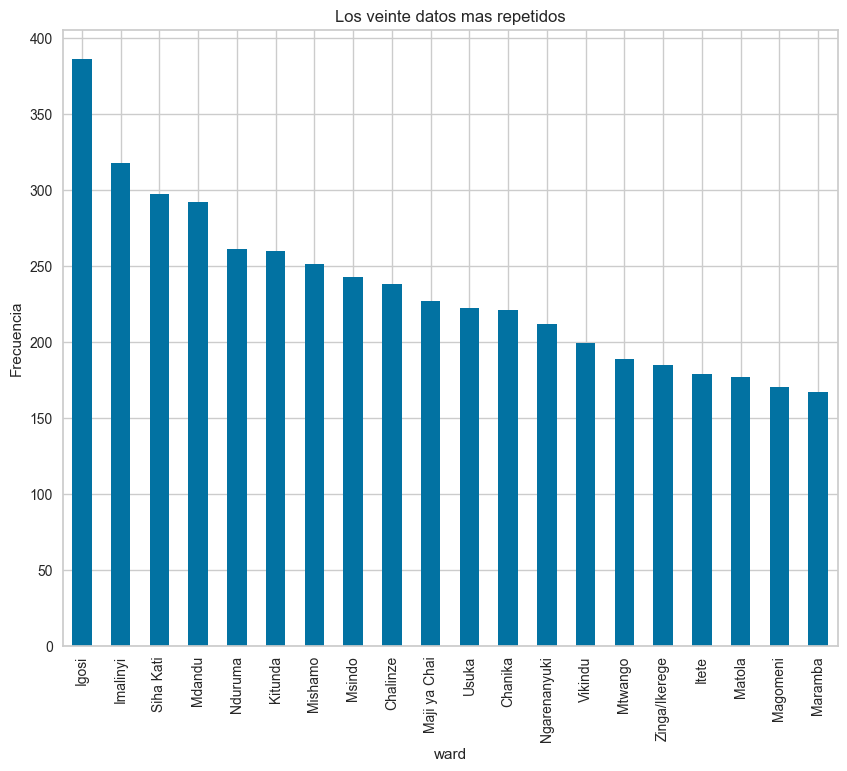

In [173]:
# Conteo de la variable ward
ward_counts = df_left['ward'].value_counts()

top_ward= ward_counts.head(20) 

# Crear la figura del gráfico
plt.figure(figsize=(10, 8))
top_ward.plot(kind='bar')
plt.title('Los veinte datos mas repetidos')
plt.xlabel('ward')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


In [174]:
# Conteo de frecuencia de cada categoría
ward_counts = df_left['ward'].value_counts().reset_index()
ward_counts.columns = ['ward', 'count']

# Mostrar las variables que tienen mayor frecuencia y su valor de frecuencia
top_ward = ward_counts.head(30)
print(top_ward)

             ward  count
0           Igosi    386
1        Imalinyi    318
2       Siha Kati    297
3          Mdandu    292
4         Nduruma    261
5         Kitunda    260
6         Mishamo    251
7          Msindo    243
8        Chalinze    238
9    Maji ya Chai    227
10          Usuka    222
11        Chanika    221
12   Ngarenanyuki    212
13        Vikindu    199
14        Mtwango    189
15  Zinga/Ikerege    185
16          Itete    179
17         Matola    177
18       Magomeni    170
19        Maramba    167
20   Wanging'ombe    164
21        Ifakara    164
22        Mvomero    164
23       Olkokola    163
24       Kikatiti    162
25          Nkoma    161
26       Maposeni    159
27      Mahongole    153
28       Nkungulu    153
29       Igongolo    151


In [175]:

# Conteo de frecuencia de cada categoría
ward_counts = df_left['ward'].value_counts().reset_index()
ward_counts.columns = ['ward', 'count']

# Calcular la media de las frecuencias
mean_frequency = ward_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")

# Calcular la mediana de las frecuencias
median_frequency = ward_counts['count'].median()
print(f"Mediana de frecuencia: {median_frequency}")


Media de frecuencia: 35.3908484270734
Mediana de frecuencia: 25.0


[]
Media de frecuencia: 35.3908484270734


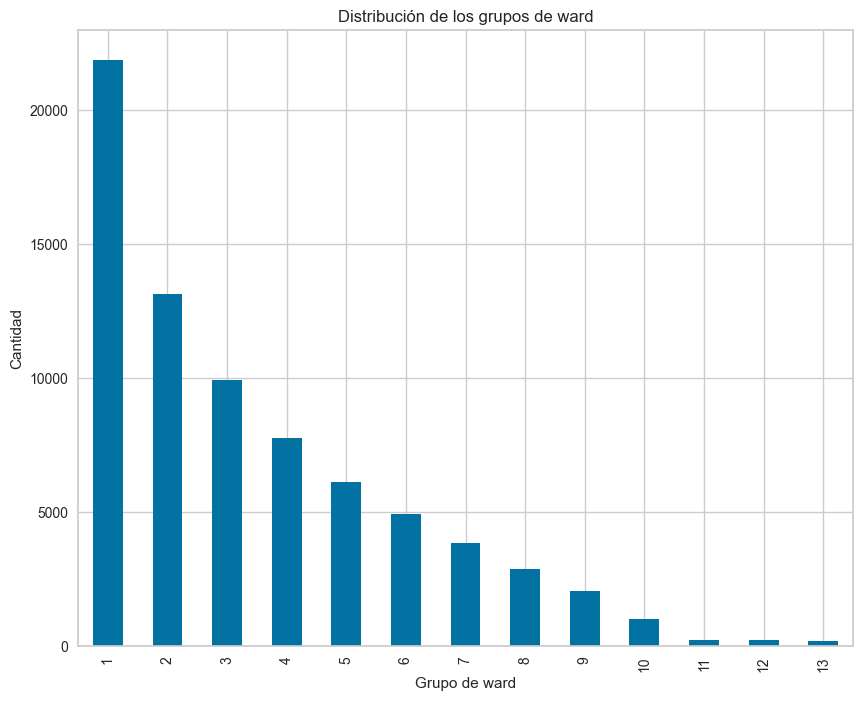

        ward  count
0      Igosi    386
1   Imalinyi    318
2  Siha Kati    297
3     Mdandu    292
4    Nduruma    261


In [176]:
# Mostrar los valores únicos de ward con un solo carácter
ward_single_char = df_left[df_left['ward'].str.len() == 1]
print(ward_single_char['ward'].unique())

# Conteo de frecuencia de cada categoría
ward_counts = df_left['ward'].value_counts().reset_index()
ward_counts.columns = ['ward', 'count']

# Calcular la media de las frecuencias
mean_frequency = ward_counts['count'].mean()
print(f"Media de frecuencia: {mean_frequency}")

# Umbral para considerar un 'ward' como frecuente basado en la media
threshold = 200 

# Valores frecuentes y no frecuentes
frequent_ward = ward_counts[ward_counts['count'] >= threshold]
infrequent_ward = ward_counts[ward_counts['count'] < threshold]

# Crear etiquetas para los ward frecuentes
frequent_ward['ward_group'] = range(1, len(frequent_ward) + 1)

# Número de grupos para los ward no frecuentes
num_infrequent_groups = 10 

# Agrupar wpt_names no frecuentes en grupos
infrequent_ward['ward_group'] = np.repeat(
    range(1, num_infrequent_groups + 1), 
    np.ceil(len(infrequent_ward) / num_infrequent_groups)
)[:len(infrequent_ward)]

# Unir los DataFrames de ward frecuentes y no frecuentes
all_ward_names = pd.concat([frequent_ward, infrequent_ward], ignore_index=True)

# Mapeamos los grupos a los datos originales
df_left = df_left.merge(all_ward_names[['ward', 'ward_group']], on='ward', how='left')

# Visualización de los resultados
plt.figure(figsize=(10, 8))
df_left['ward_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de los grupos de ward')
plt.xlabel('Grupo de ward')
plt.ylabel('Cantidad')
plt.show()

# Mostrar las variables que tienen mayor frecuencia y su valor de frecuencia
top_ward_names = ward_counts.head()
print(top_ward_names)

Tal y como podemos observar, existen variables categóricas y objeto que tienen una grandísima cantidad de valores únicos. Nuestro objetivo con este tipo de variables va a ser agruparlas por frecuencia en un número de grupos más asequible para el algoritmo de ml. Por otro lado, también cambiaré las categoricas a numericas con el fin de poder optimizar el modelo y que el ajuste por ml sea más adecuado. 

Existen categorías que tienen una grandísima cantidad de valores agrupados en un mismo valor, vease en el caso de la variable installer con el valor de DWE, que aparece no menos de 17400 veces de 55745, el valor de Government of Tanzania en el caso de la variable Funder, la cual tambien tiene una gran representatividad. Con este tipo de valores he optado por hacerlos un grupo en si mismo nuevamente para que haya la menor pérdida de representatividad a la hora de agrupar, puesto que ya agrupando se pierde algo de información.
La forma en la que las voy a agrupar va a ser a través de la frecuencia relativa, en un principio pensé en hacerlo por k-means y que me escogiese los grupos en función de la cercanía en las frecuencias pero lo descarté rapidamente por no parecerme un método tan seguro que haciendolo a mano. Puesto que había variables que necesitaban de un estudio más por menorizado y necesitaba saber cuantos grupos eran necesarios para que se mantuviese la información de la variable lo más que se pudiese y que no se diluyese por el hecho de realizar el análisis solamente por orden de frecuencia. Ha habido variables que han tenido más o menos grupos en función de la dispersión y cantidad de datos únicos distintos de la misma.

Me he decidido por dejar los valores únicos de las variables catégoricas, cuando tenian un solo caracter por que en el test también hay variables que tienen un solo caracter y que había que predecir. Seguramente sea un error a la hora de meter los datos pero no vamos a dejar de predecir un valor de la variable solo por el hecho de que no tenga sentido. Puede existir un patrón con el resto de variables y seguir teniendo potencia de predicción por tener valor.

Por último, también tendremos que cambiar la variable date_recorded puesto que está en formato fecha y el modelo no aceptará ese formato. 

##### Conversión de la variable date_recorded


In [177]:
# Coversión de la variable date_recorded.
df_left['date_recorded'] = pd.to_datetime(df_left['date_recorded'])
#test['date_recorded'] = pd.to_datetime(test['date_recorded'])


### Imputación de valores aleatorios.

In [178]:
import pandas as pd
from sklearn.impute import SimpleImputer

# 1. Separar la columna status_group 
y_prueba = df_left['status_group']  # Guardar la columna objetivo

# Eliminar la columna status_group temporalmente para evitar imputación
df_left_sin_y = df_left.drop(columns=['status_group'])

# Separar columnas categóricas status_group numéricas
categoricas = df_left_sin_y.select_dtypes(include=['object']).columns
numericas = df_left_sin_y.select_dtypes(include=['float64', 'int64']).columns

# Imputar columnas categóricas con la moda
imputer_cat = SimpleImputer(strategy='most_frequent')
df_left_sin_y[categoricas] = imputer_cat.fit_transform(df_left_sin_y[categoricas])

# Imputar columnas numéricas con la mediana
imputer_num = SimpleImputer(strategy='median')
df_left_sin_y[numericas] = imputer_num.fit_transform(df_left_sin_y[numericas])

# 3. Volver a agregar la columna y al DataFrame
df_left = pd.concat([df_left_sin_y, y_prueba], axis=1)

# Verificar si los nulos han sido manejados correctamente
print("Porcentaje de nulos después del tratamiento:")
print(df_left.isnull().mean() * 100)



Porcentaje de nulos después del tratamiento:
id                        0.0
date_recorded             0.0
funder                    0.0
gps_height                0.0
installer                 0.0
longitude                 0.0
latitude                  0.0
wpt_name                  0.0
num_private               0.0
basin                     0.0
subvillage                0.0
region                    0.0
region_code               0.0
district_code             0.0
lga                       0.0
ward                      0.0
public_meeting            0.0
recorded_by               0.0
scheme_management         0.0
scheme_name               0.0
permit                    0.0
construction_year         0.0
extraction_type           0.0
extraction_type_group     0.0
extraction_type_class     0.0
management                0.0
management_group          0.0
payment                   0.0
payment_type              0.0
water_quality             0.0
quality_group             0.0
quantity                 

### Transformación de las variables object a labels tag

In [179]:
from sklearn.preprocessing import LabelEncoder


# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Convertir las columnas categóricas a tipo 'category'
for column in df_left.select_dtypes(include=['object']).columns:
    df_left[column] = df_left[column].astype('category')

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar el codificador a cada columna categórica
for column in df_left.select_dtypes(include=['category']).columns:
    df_left[column] = label_encoder.fit_transform(df_left[column])

df_left

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,is_test,amount_tsh_category,poblacion,subvillage_group,funder_group,installer_group,wpt_name_group,ward_group,status_group
0,0.0,2012-11-13,1840,0.0,1922,33.125828,-5.118154,36143,0.0,3,10096,19,14.0,3.0,124,316,1,0,6,644,1,0.0,0,0,1,7,4,6,6,3,3,1,1,7,5,0,4,3,0.0,3,2,2.0,1.0,1.0,4.0,2.0,2.0
1,1.0,2011-03-05,1695,1978.0,1774,34.770717,-9.395642,45682,0.0,6,9920,3,11.0,4.0,91,2054,1,0,6,644,0,2008.0,12,9,4,7,4,0,2,6,2,1,1,7,5,0,4,3,0.0,3,1,2.0,1.0,1.0,1.0,1.0,1.0
2,2.0,2011-03-27,938,0.0,1035,36.115056,-6.279268,1330,0.0,8,19848,2,1.0,4.0,11,1359,1,0,6,1530,1,0.0,7,4,2,7,4,4,5,6,2,2,2,3,0,0,2,1,0.0,3,2,1.0,1.0,1.0,1.0,6.0,1.0
3,3.0,2013-06-03,486,1639.0,229,37.147432,-3.187555,548,0.0,5,20786,6,3.0,5.0,16,1092,1,0,9,1148,1,1999.0,3,1,0,9,4,4,5,6,2,1,1,8,6,0,1,1,0.0,2,1,2.0,1.0,1.0,22.0,1.0,1.0
4,4.0,2011-03-22,235,0.0,258,36.164893,-6.099289,3172,0.0,8,9602,2,1.0,4.0,11,1004,1,0,6,644,1,0.0,8,5,1,7,4,6,6,6,2,0,0,7,5,0,4,3,0.0,3,2,17.0,1.0,2.0,22.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74245,39307.0,2011-02-24,293,34.0,456,38.852669,-6.582841,30976,0.0,8,21327,14,6.0,1.0,3,2087,1,0,6,168,1,1988.0,7,4,2,7,4,0,2,6,2,1,1,6,4,1,1,1,1.0,3,1,2.0,1.0,1.0,8.0,1.0,NaN
74246,18990.0,2011-03-21,584,0.0,675,37.451633,-5.350428,1352,0.0,5,12687,20,4.0,7.0,33,1454,1,0,6,644,0,1994.0,8,5,1,7,4,2,0,4,4,2,2,7,5,0,4,3,1.0,1,0,3.0,3.0,3.0,8.0,3.0,NaN
74247,28749.0,2013-03-04,507,1476.0,442,34.739804,-4.585587,1821,0.0,0,4755,18,13.0,2.0,109,2000,1,0,6,644,1,2010.0,3,1,0,7,4,0,2,6,2,2,2,0,1,1,1,1,1.0,3,1,1.0,1.0,1.0,1.0,3.0,NaN
74248,33492.0,2013-02-18,482,998.0,442,35.432732,-10.584159,14467,0.0,1,15803,16,10.0,2.0,111,1072,1,0,6,1767,1,2009.0,3,1,0,7,4,0,2,6,2,2,2,6,4,1,1,1,1.0,3,1,3.0,1.0,1.0,1.0,1.0,NaN


Con este código transformé el resto de variables categóricas a numéricas para que el algoritmo me aceptase esas variables. Probé haciendolo con un host-encoding al inicio, pero me dejaba un dataframe con una grandísima cantidad de variables. Finalmente, opté por hacer un label encoding y que me transformase las variables a numéricas. 

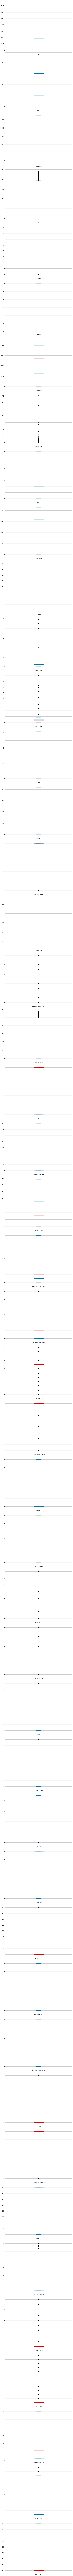

In [180]:
import matplotlib.pyplot as plt

# Selección de variables numéricas.

numeric_cols = df_left.select_dtypes(include=np.number).columns

# Crear un boxplot para cada columna numérica
df_left[numeric_cols].plot(kind='box', subplots=True, layout=(len(numeric_cols), 1), figsize=(8, 6 * len(numeric_cols)), sharey=False)
plt.tight_layout()
plt.show()

### Quitar outliers.

In [181]:
num_cols = df_left.select_dtypes(include=[np.number]).columns

def quitaroutl(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        primer = Q1 - 1.5 * IQR
        ultimo = Q3 + 1.5 * IQR
        df = df[(df[col] >= primer) & (df[col] <= ultimo)]
    
    return df

quitaroutl(df_left,num_cols)


,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,is_test,amount_tsh_category,poblacion,subvillage_group,funder_group,installer_group,wpt_name_group,ward_group,status_group
13,16.0,2013-02-03,1741,1014.0,442,35.333713,-10.469638,12592,0.0,1,92,16,10.0,2.0,111,661,1,0,6,1753,1,1984.0,3,1,0,7,4,5,3,6,2,0,0,8,6,0,1,1,0.0,3,2,17.0,1.0,1.0,22.0,2.0,2.0
14,17.0,2013-03-28,2105,1606.0,442,36.624293,-3.276274,42288,0.0,5,19438,0,2.0,2.0,0,1767,1,0,6,1632,1,2010.0,3,1,0,7,4,0,2,6,2,1,1,8,6,0,1,1,0.0,3,1,1.0,1.0,1.0,22.0,2.0,1.0
21,24.0,2011-03-14,1549,209.0,442,38.798179,-5.117748,44134,0.0,5,12475,20,4.0,3.0,80,626,1,0,6,1229,0,1999.0,3,1,0,7,4,0,2,6,2,3,3,8,6,0,1,1,0.0,3,1,1.0,1.0,1.0,22.0,4.0,2.0
25,28.0,2011-07-29,507,0.0,442,33.678669,-9.392807,7331,0.0,1,9162,10,12.0,4.0,100,371,1,0,6,1201,1,0.0,3,1,0,7,4,0,2,6,2,1,1,8,6,0,1,1,0.0,3,2,1.0,1.0,1.0,1.0,1.0,1.0
44,51.0,2011-03-23,507,1209.0,442,38.464680,-4.863061,1436,0.0,5,352,20,4.0,1.0,52,87,1,0,6,1474,1,1969.0,3,1,0,7,4,0,2,6,2,1,1,8,6,0,1,1,0.0,3,1,17.0,1.0,1.0,22.0,8.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59342,74172.0,2011-03-02,1547,2337.0,339,34.285085,-9.282062,45682,0.0,1,20501,3,11.0,3.0,55,1060,1,0,6,1354,0,2002.0,3,1,0,7,4,0,2,6,2,1,1,8,6,0,1,1,0.0,3,2,12.0,1.0,1.0,1.0,1.0,1.0
59344,74175.0,2011-07-21,507,0.0,442,33.646542,-9.239662,6257,0.0,1,8996,10,12.0,4.0,100,577,1,0,6,1201,1,0.0,3,1,0,7,4,0,2,6,2,1,1,8,6,0,1,1,0.0,3,2,2.0,1.0,1.0,1.0,1.0,1.0
59349,74183.0,2011-08-24,573,0.0,442,33.652288,-2.776589,30862,0.0,4,20589,13,19.0,2.0,54,1665,1,0,6,644,1,0.0,8,5,1,7,4,0,2,6,2,1,1,7,5,0,4,3,0.0,3,2,23.0,1.0,1.0,16.0,1.0,3.0
59361,74196.0,2011-07-24,293,0.0,306,33.783230,-9.495462,9362,0.0,1,4852,10,12.0,3.0,46,393,1,0,6,2509,1,0.0,3,1,0,7,4,0,2,6,2,0,0,8,6,0,1,1,0.0,3,2,1.0,1.0,1.0,16.0,1.0,2.0


Con la función quitaroutl quería quitar los outliers de la distribución de las variables numéricas para que no me afectasen a la hora de realizar las estimaciones del modelo. He usado los rangos intercuartilicos y la diferencia entre el primero y el último por el factor 1.5 para que me quisate aquellos valores por encima y por debajo del primer cuartil y del cuartil tercero. 

### Partición en prueba y test. Eliminación de algunas características de las variables y Matríz de correlaciones.

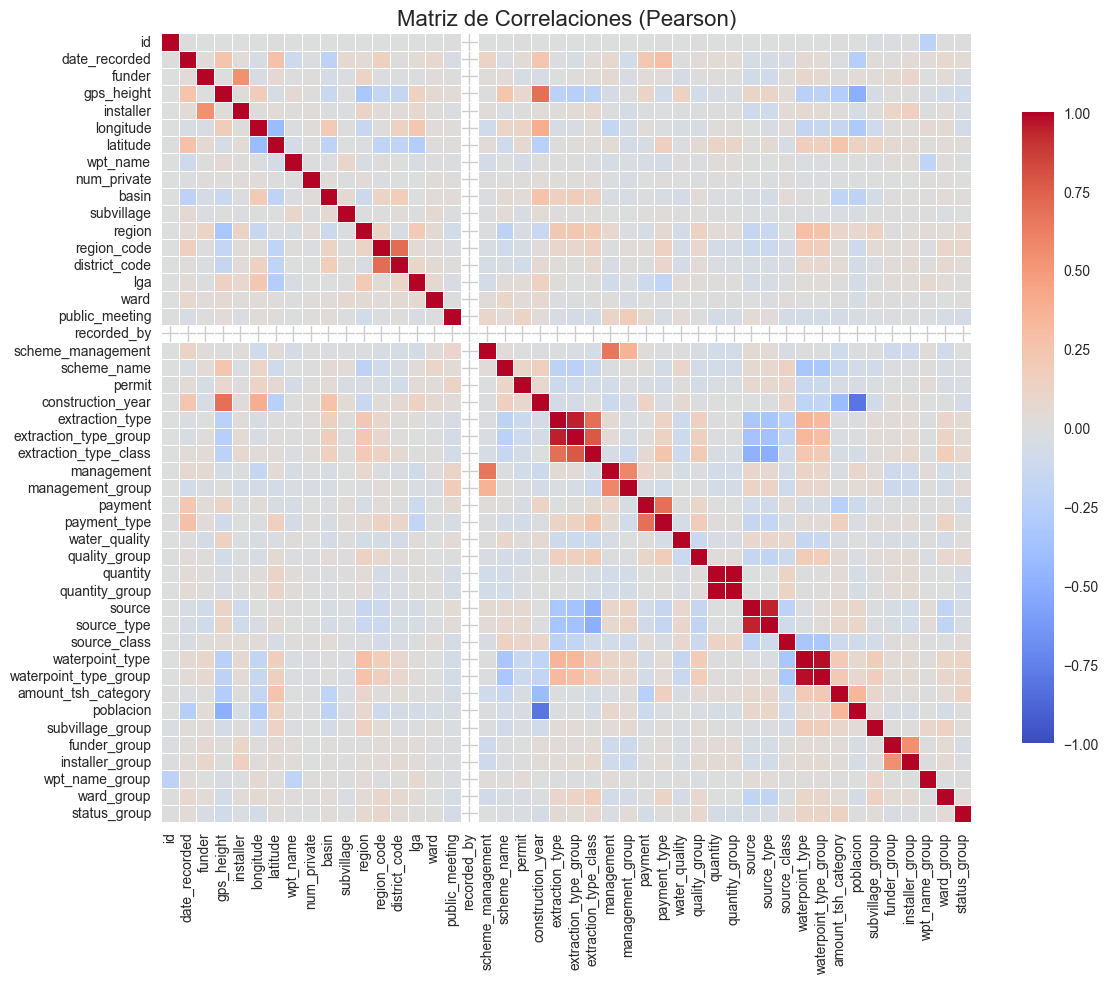

,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,amount_tsh_category,poblacion,subvillage_group,funder_group,installer_group,wpt_name_group,ward_group,status_group
id,1.000000,0.003451,-0.006071,-0.004596,-0.000782,-0.001565,0.002068,-0.002653,-0.002700,-0.000326,-0.007131,-0.000753,-0.003410,-0.002388,-0.000265,-0.002940,0.003762,NaN,-0.005452,-0.002073,0.000115,-0.002024,-0.001686,-0.000900,-0.001418,-0.005008,-0.003376,-0.001010,0.000021,-0.001895,0.003719,-0.001146,-0.001146,-0.001843,-0.003487,-0.005482,-0.001726,-0.002632,0.006204,-0.003755,-0.030252,-0.017062,-0.015100,-0.218460,0.001068,0.002879
date_recorded,0.003451,1.000000,0.032724,0.255880,0.033966,-0.045199,0.267263,-0.103560,-0.019863,-0.217373,0.056587,0.039890,0.151388,0.012837,0.045601,0.079119,-0.031648,NaN,0.119668,-0.028792,0.039657,0.239145,-0.020182,-0.041925,0.029278,0.063506,-0.079433,0.223336,0.277575,0.003650,0.025254,0.042276,0.042276,-0.054418,-0.062237,-0.036228,0.059652,0.044232,-0.016344,-0.260078,0.017069,0.014649,0.032647,0.026956,0.076519,0.044160
funder,-0.006071,0.032724,1.000000,-0.002121,0.540179,-0.037912,0.061022,0.005151,0.013431,-0.063589,-0.017452,0.127938,-0.010667,-0.021069,-0.009023,0.024686,0.000949,NaN,0.016799,0.034643,-0.047039,-0.051133,-0.006020,0.007941,0.032990,0.059725,-0.032029,0.032360,0.024681,-0.057245,0.012496,0.008158,0.008158,-0.090315,-0.094162,0.021324,0.088366,0.066532,0.010548,0.034352,0.030778,0.055572,0.094904,-0.007038,0.039749,-0.033063
gps_height,-0.004596,0.255880,-0.002121,1.000000,0.022294,0.173444,-0.054636,0.056264,0.007425,-0.136527,0.007643,-0.322764,-0.168682,-0.159769,0.142790,0.055135,0.032942,NaN,0.001795,0.237851,0.081131,0.684267,-0.230450,-0.251087,-0.215075,-0.055664,0.005167,0.113379,-0.092520,0.135173,-0.084912,-0.035483,-0.035483,0.111277,0.111642,0.038560,-0.236131,-0.214704,-0.266385,-0.502353,-0.057488,0.010444,0.005831,-0.037351,-0.081245,-0.099606
installer,-0.000782,0.033966,0.540179,0.022294,1.000000,0.010543,0.042895,0.013569,0.017646,-0.012224,-0.020412,0.116890,0.030151,0.026437,0.078974,0.021832,-0.022893,NaN,0.020503,-0.029151,0.005535,0.025268,0.014231,0.044961,0.072371,-0.014527,-0.062098,-0.013577,-0.007172,-0.009266,-0.012191,0.007502,0.007502,-0.107605,-0.094806,0.042402,0.064030,0.045550,0.008868,-0.050072,0.012739,0.101936,0.161204,-0.012479,0.028033,-0.027923
longitude,-0.001565,-0.045199,-0.037912,0.173444,0.010543,1.000000,-0.418306,-0.017246,0.024185,0.197614,0.006294,-0.152382,0.010532,0.142739,0.231260,0.029987,0.021521,NaN,-0.094814,0.105930,0.117188,0.395674,-0.039479,-0.033660,0.029253,-0.167917,-0.068312,0.018574,-0.013677,-0.045054,-0.041699,0.019284,0.019284,-0.002170,-0.034824,0.025015,-0.174455,-0.155762,-0.159650,-0.311175,-0.096449,0.010237,0.019017,0.054997,0.054144,-0.072209
latitude,0.002068,0.267263,0.061022,-0.054636,0.042895,-0.418306,1.000000,-0.064301,0.006214,-0.203761,-0.002909,-0.023100,-0.198880,-0.195386,-0.272413,0.013358,0.008293,NaN,0.036839,-0.100302,0.068398,-0.242639,0.005986,0.012487,0.020539,0.041343,-0.066860,-0.041454,0.156945,-0.017270,0.047944,0.116853,0.116853,0.013942,0.052677,-0.047940,0.171241,0.156550,0.242246,0.136917,0.125371,0.057936,0.051957,0.011200,0.037492,0.020809
wpt_name,-0.002653,-0.103560,0.005151,0.056264,0.013569,-0.017246,-0.064301,1.000000,0.002753,-0.017073,0.090971,-0.044410,0.013788,-0.005334,-0.035647,0.001334,-0.009971,NaN,-0.063703,-0.005217,-0.067203,0.006669,0.005129,0.001312,-0.019641,-0.051666,-0.024639,-0.049187,-0.057603,0.012995,-0.016159,0.020915,0.020915,0.000516,-0.001932,0.012080,-0.026433,-

In [182]:
# Dividir de nuevo en conjuntos de prueba y test
df_prueba_limpio = df_left[df_left['is_test'] == 0].drop(columns=['is_test'])
df_test_limpio = df_left[df_left['is_test'] == 1].drop(columns=['is_test'])

# Eliminación de características.
df_prueba_limpio=df_prueba_limpio[df_prueba_limpio['gps_height']>= 0]


def create_correlation_matrix(df, method='pearson', annot=False):
    correlation_matrix = df.corr(method=method)
    
    plt.figure(figsize=(12, 10))
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=annot,
        cmap='coolwarm',
        fmt='.2f' if annot else None,
        linewidths=0.5,
        vmin=-1,
        vmax=1,
        cbar_kws={"shrink": 0.8}  
    )
    plt.title(f'Matriz de Correlaciones ({method.capitalize()})', fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout() 

    plt.show()
    
    return correlation_matrix

create_correlation_matrix(df_prueba_limpio) 

Existe alta correlación entre varias variables que, en muchos casos, dan la misma información (o por lo menos parecida) que otra variable análoga. Estas variables pueden suponer un problema en los modelos por sernos redundantes y darnos la misma información o por lo menos parecida que las otras. Vease el grupo de las variables quality o las variables que tienen que ver con el tipo de pago (payment). En otros casos, la variable recorded_by que no nos proporciona una información verdaderamente útil debería de ser deshechada por que no aporta ningún valor y antes bien, puede entorpecer el modelo. No tiene correlación con ninguna variable. 

Por otro lado, he optado por eliminar los valores de la variable gps_height que estén por debajo de 0 ya que me daba la sensación de ser un problema o bien de medición o bien de recogida de los datos mismos. 

In [183]:
l=df_prueba_limpio.columns.tolist()

# Cambio el ID a índice para utlizarlo como etiqueta y evitar que se use como variable explicativa del modelo.
df_prueba_limpio.set_index('id', inplace=True)

### Importancia a priori de las variables

In [184]:
corr = abs(df_prueba_limpio.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
amount_tsh_category,0.133703
waterpoint_type,0.120544
waterpoint_type_group,0.116878
gps_height,0.099606
region_code,0.090515
extraction_type_class,0.085520
quality_group,0.083863
longitude,0.072209
payment,0.071762


In [185]:
list(corr[['status_group']].sort_values(by = 'status_group',ascending = False).index)

['status_group',
 'amount_tsh_category',
 'waterpoint_type',
 'waterpoint_type_group',
 'gps_height',
 'region_code',
 'extraction_type_class',
 'quality_group',
 'longitude',
 'payment',
 'region',
 'public_meeting',
 'construction_year',
 'quantity_group',
 'quantity',
 'source',
 'extraction_type',
 'extraction_type_group',
 'date_recorded',
 'source_type',
 'district_code',
 'management_group',
 'ward_group',
 'source_class',
 'funder_group',
 'funder',
 'permit',
 'installer',
 'management',
 'subvillage_group',
 'scheme_name',
 'installer_group',
 'latitude',
 'basin',
 'payment_type',
 'wpt_name',
 'ward',
 'lga',
 'water_quality',
 'subvillage',
 'num_private',
 'poblacion',
 'scheme_management',
 'wpt_name_group',
 'recorded_by']

### Elección de las variables para el modelo final

In [186]:
#Eliminación del dataframe prueba.

df_prueba_limpio=df_prueba_limpio.drop('extraction_type_group',axis=1)
# df_prueba_limpio=df_prueba_limpio.drop('waterpoint_type_group',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('quantity',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('funder',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('management',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('water_quality',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('payment_type',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('recorded_by',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('poblacion',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('scheme_management',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('wpt_name_group',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('subvillage',axis=1)
df_prueba_limpio=df_prueba_limpio.drop('lga',axis=1)
df_prueba_limpio = df_prueba_limpio.drop(['date_recorded'], axis=1)


#Eliminación del dataframe test.
df_test_limpio=df_test_limpio.drop('extraction_type_group',axis=1)
# df_test_limpio=df_test_limpio.drop('waterpoint_type_group',axis=1)
df_test_limpio=df_test_limpio.drop('quantity',axis=1)
df_test_limpio=df_test_limpio.drop('funder',axis=1)
df_test_limpio=df_test_limpio.drop('management',axis=1)
df_test_limpio=df_test_limpio.drop('water_quality',axis=1)
df_test_limpio=df_test_limpio.drop('payment_type',axis=1)
df_test_limpio=df_test_limpio.drop('recorded_by',axis=1)
df_test_limpio=df_test_limpio.drop('poblacion',axis=1)
df_test_limpio=df_test_limpio.drop('scheme_management',axis=1)
df_test_limpio=df_test_limpio.drop('wpt_name_group',axis=1)
df_test_limpio=df_test_limpio.drop('subvillage',axis=1)
df_test_limpio=df_test_limpio.drop('lga',axis=1)
df_test_limpio=df_test_limpio.drop('date_recorded',axis=1)

## Modelos de predicción

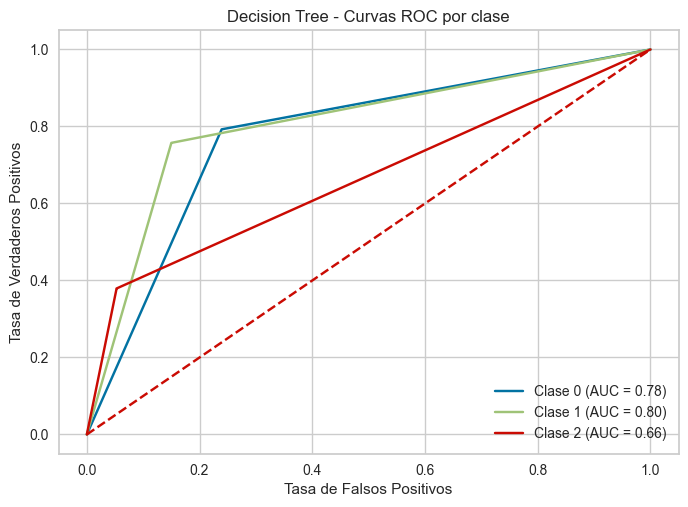

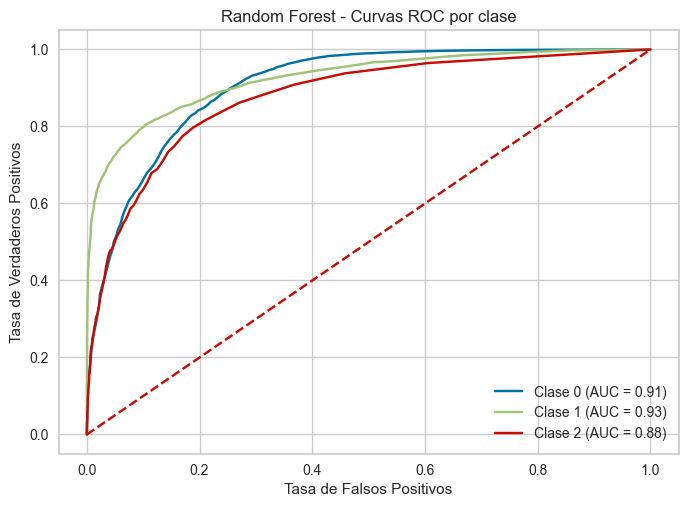

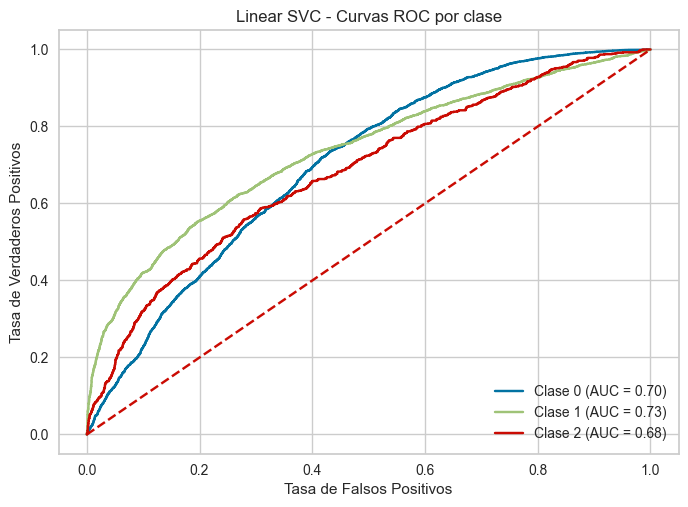

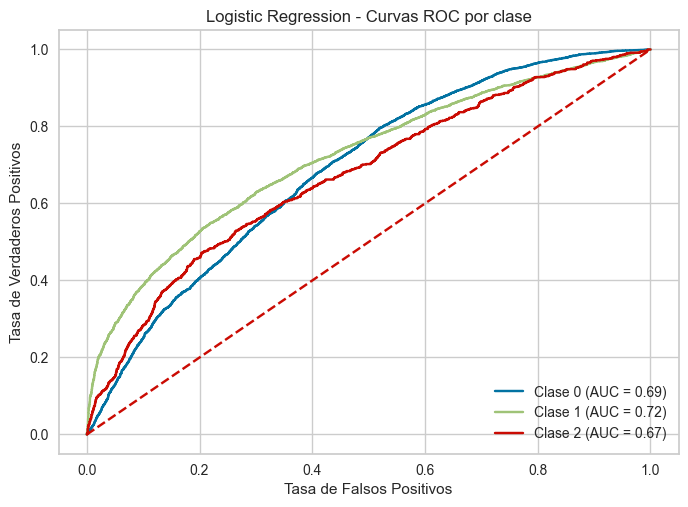

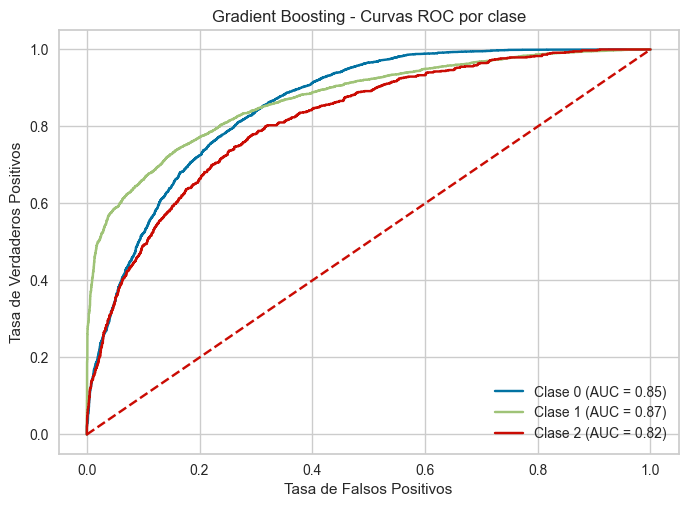

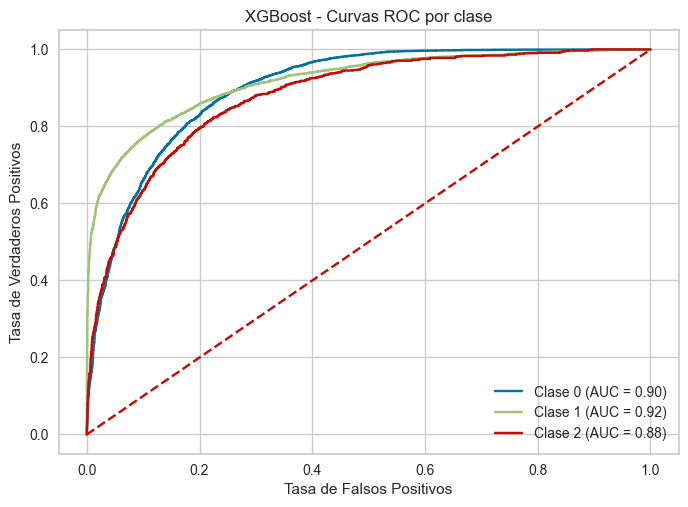

In [187]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy.special import softmax
from xgboost import XGBClassifier
import numpy as np

def saca_metricas_multiclase(y_real, y_pred_proba, num_clases, model_name): 
    # Binarizamos las etiquetas de verdad para un enfoque de One-vs-Rest
    y_real_bin = label_binarize(y_real, classes=np.arange(num_clases))
    
    # Para cada clase, calcular la curva ROC
    for i in range(num_clases):
        fpr, tpr, _ = roc_curve(y_real_bin[:, i], y_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title(f'{model_name} - Curvas ROC por clase')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.legend(loc='lower right')
    plt.show()

# Separar variable objetivo 'y' y variables predictoras 'X'
X = df_prueba_limpio.drop(['status_group'], axis=1)
y = df_prueba_limpio['status_group']

# Convertir las etiquetas de y para que empiecen desde 0.
y = y.astype(int) - 1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el número de clases (asumiendo que es un problema de clasificación multiclase)
num_clases = len(np.unique(y))

# Entrenar y evaluar el modelo DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion="gini").fit(X_train, y_train)
tree_pred_proba = classifier1.predict_proba(X_test)
saca_metricas_multiclase(y_test, tree_pred_proba, num_clases, "Decision Tree")

# Entrenar y evaluar el modelo RandomForestClassifier
classifier2 = RandomForestClassifier().fit(X_train, y_train)
pred2_proba = classifier2.predict_proba(X_test)
saca_metricas_multiclase(y_test, pred2_proba, num_clases, "Random Forest")

# Entrenar y evaluar el modelo LinearSVC
classifier3 = LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)
pred3_decision = classifier3.decision_function(X_test)
pred3_proba = softmax(pred3_decision, axis=1)
saca_metricas_multiclase(y_test, pred3_proba, num_clases, "Linear SVC")

# Entrenar y evaluar el modelo LogisticRegression
classifier4 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred4_proba = classifier4.predict_proba(X_test)
saca_metricas_multiclase(y_test, pred4_proba, num_clases, "Logistic Regression")

# Entrenar y evaluar el modelo GradientBoostingClassifier
classifier5 = GradientBoostingClassifier().fit(X_train, y_train)
pred5_proba = classifier5.predict_proba(X_test)
saca_metricas_multiclase(y_test, pred5_proba, num_clases, "Gradient Boosting")

# Entrenar y evaluar el modelo XGBClassifier
classifier6 = XGBClassifier().fit(X_train, y_train)
pred6_proba = classifier6.predict_proba(X_test)
saca_metricas_multiclase(y_test, pred6_proba, num_clases, "XGBoost")


Tal y como podemos observar, el mejor modelo es el RandomForestClassifier el cual obtiene un AUC= 0.93, es por eso que he optado por elegirlo como mi modelo (AUCs de 0.91, 0.93, y 0.87, lo que indica una buena capacidad de clasificación para cada clase). El modelo  xgboost también presenta buenos datos, con unos AUCs de 0.90, 0.92 y 0.88. Usaré los dos para hacer la predicción de la columna status_group y ver las diferencias en la calidad de la predicción. También realizaré la predicción con el Random Forest con todas las variables.  

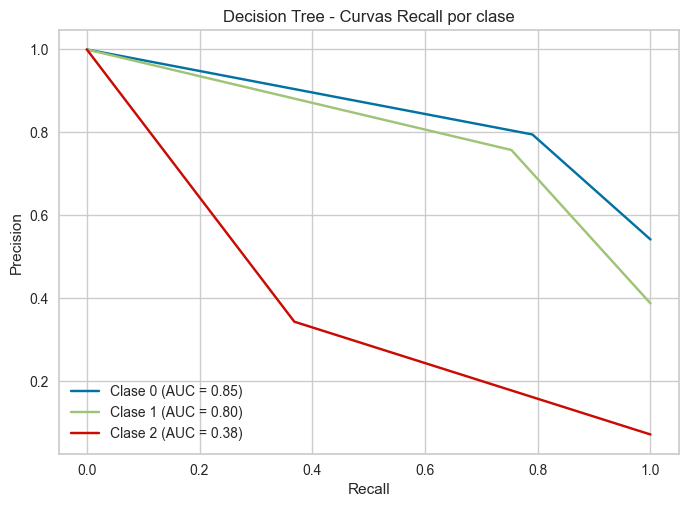

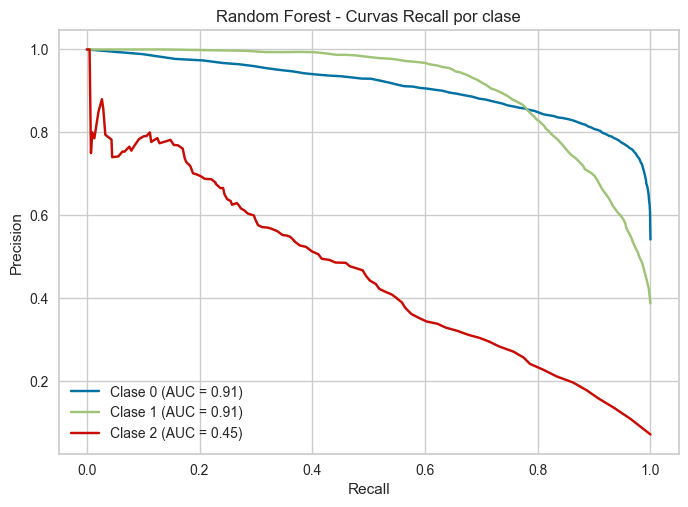

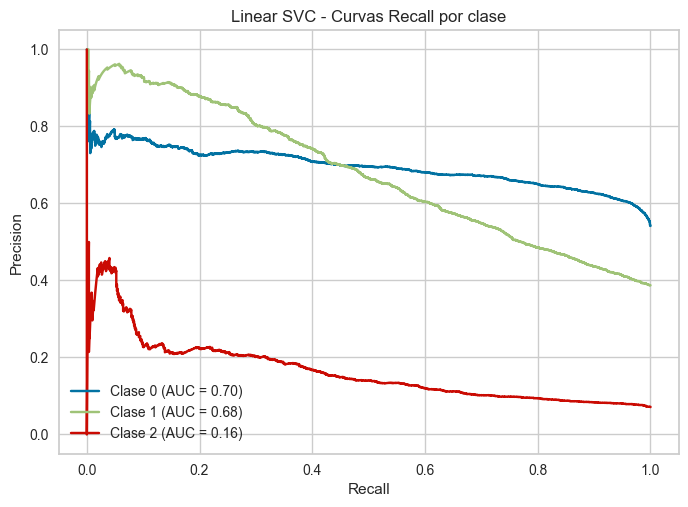

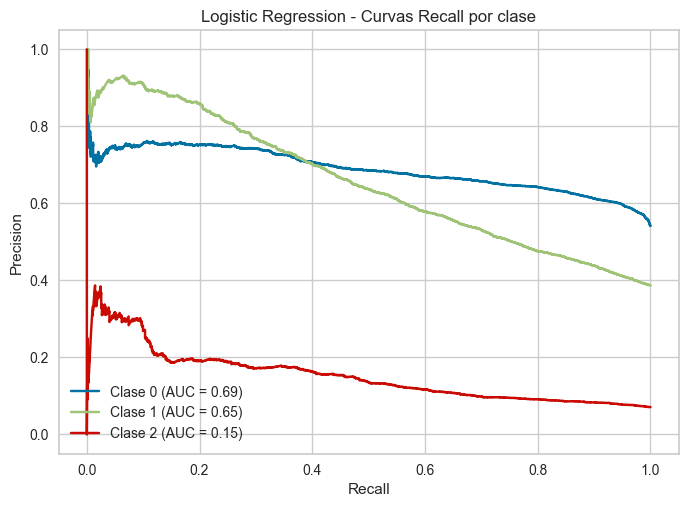

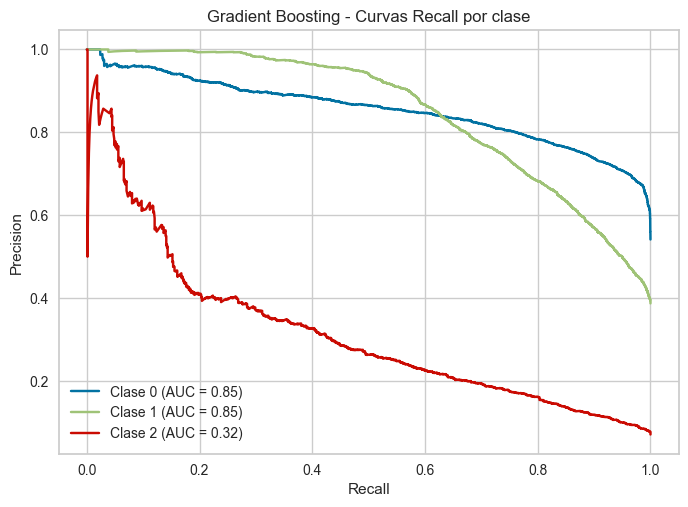

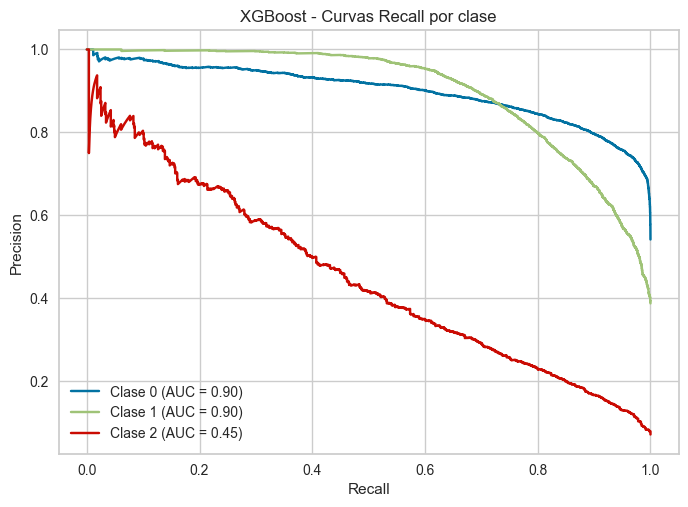

In [188]:
from sklearn.metrics import precision_recall_curve, auc

def saca_curva_recall(y_real, y_pred_proba, num_clases, model_name): 
    y_real_bin = label_binarize(y_real, classes=np.arange(num_clases))
    for i in range(num_clases):
        precision, recall, _ = precision_recall_curve(y_real_bin[:, i], y_pred_proba[:, i])
        auc_score = auc(recall, precision)
        plt.plot(recall, precision, label=f'Clase {i} (AUC = {auc_score:.2f})')
    
    plt.title(f'{model_name} - Curvas Recall por clase')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()


# Definir el número de clases (asumiendo que es un problema de clasificación multiclase)
num_clases = len(np.unique(y))

# Entrenar y evaluar el modelo DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion="gini").fit(X_train, y_train)
tree_pred_proba = classifier1.predict_proba(X_test)
saca_curva_recall(y_test, tree_pred_proba, num_clases, "Decision Tree")

# Entrenar y evaluar el modelo RandomForestClassifier
classifier2 = RandomForestClassifier().fit(X_train, y_train)
pred2_proba = classifier2.predict_proba(X_test)
saca_curva_recall(y_test, pred2_proba, num_clases, "Random Forest")

# Entrenar y evaluar el modelo LinearSVC
classifier3 = LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)
pred3_decision = classifier3.decision_function(X_test)
pred3_proba = softmax(pred3_decision, axis=1)
saca_curva_recall(y_test, pred3_proba, num_clases, "Linear SVC")

# Entrenar y evaluar el modelo LogisticRegression
classifier4 = LogisticRegression(max_iter=10000).fit(X_train, y_train)
pred4_proba = classifier4.predict_proba(X_test)
saca_curva_recall(y_test, pred4_proba, num_clases, "Logistic Regression")

# Entrenar y evaluar el modelo GradientBoostingClassifier
classifier5 = GradientBoostingClassifier().fit(X_train, y_train)
pred5_proba = classifier5.predict_proba(X_test)
saca_curva_recall(y_test, pred5_proba, num_clases, "Gradient Boosting")

# Entrenar y evaluar el modelo XGBClassifier
classifier6 = XGBClassifier().fit(X_train, y_train)
pred6_proba = classifier6.predict_proba(X_test)
saca_curva_recall(y_test, pred6_proba, num_clases, "XGBoost")

### Variables importantes del modelo Random Forest

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

#Definición del modelo 2, RandomForestClassifier.
classifier2 = RandomForestClassifier()

# Realizar validación cruzada
cv = cross_val_score(
    classifier2,
    X_train, 
    y_train,
    scoring='roc_auc_ovo',  
    cv=5
)

print(cv)
print("CV ROC (media):", np.mean(cv))
print("CV ROC (desviación estándar):", np.std(cv))

# Ajustar el modelo random forest classifier (classifier2) con todos los datos de entrenamiento
classifier2.fit(X_train, y_train)

# Calcula y  muestra las características más importantes del modelo.
imp = {}
for i in range(len(X_train.columns)):
    imp[X_train.columns[i]] = [classifier2.feature_importances_[i]]

# Muestra las 10 características más importantes, ordenándolas de mayor a menor.
top_features = pd.DataFrame.from_dict(imp, orient="index", columns=["Importancia"]).sort_values("Importancia", ascending=False).head(10)
top_features.style.background_gradient()



[0.87893708 0.876699   0.87490895 0.87789918 0.8722411 ]
CV ROC (media): 0.8761370617548311
CV ROC (desviación estándar): 0.002364222254617115


,Importancia
quantity_group,0.117223
longitude,0.102540
latitude,0.100215
wpt_name,0.074347
gps_height,0.056748
subvillage_group,0.049895
construction_year,0.046460
ward,0.044112
waterpoint_type,0.036050
installer,0.033229


### Capacidad de predicción y de Recall del Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold


# Definir el modelo RandomForestClassifier y los parámetros de la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [5, 10 ,50 ],
    'criterion': ['gini', 'entropy'],
    'max_depth': [16, 20],
    'max_features': ['log2', 'sqrt',None]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

model_grid = GridSearchCV(
    estimator=classifier2,
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_kfold,
    n_jobs=-1
)

# Entrenar el modelo con GridSearchCV
model_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(model_grid.best_params_)
print("Mejor score encontrado (accuracy):")
print(model_grid.best_score_)

# Evaluar el modelo en el conjunto de prueba
tree_pred_proba = model_grid.predict_proba(X_test)

# Convertir las predicciones de probabilidad a etiquetas
tree_pred_labels = np.argmax(tree_pred_proba, axis=1)

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, tree_pred_labels))

Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 50}
Mejor score encontrado (accuracy):
0.8016320963903935
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      6272
           1       0.87      0.76      0.81      4486
           2       0.63      0.29      0.40       823

    accuracy                           0.81     11581
   macro avg       0.76      0.66      0.69     11581
weighted avg       0.81      0.81      0.80     11581



### Capacidad de predicción y de Recall del modelo Xgboost.

In [191]:
# Definir el modelo xgboost y los parámetros de la búsqueda en cuadrícula
param_grid = {
    'n_estimators': [5, 10 ,50 ],
    'criterion': ['gini', 'entropy'],
    'max_depth': [16, 20],
    'max_features': ['log2', 'sqrt',None]
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=11)

model_grid = GridSearchCV(
    estimator=classifier6,
    param_grid=param_grid,
    scoring='accuracy',
    cv=stratified_kfold,
    n_jobs=-1
)

# Entrenar el modelo con GridSearchCV
model_grid.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor score
print("Mejores parámetros encontrados:")
print(model_grid.best_params_)
print("Mejor score encontrado (accuracy):")
print(model_grid.best_score_)

# Evaluar el modelo en el conjunto de prueba
tree_pred_proba = model_grid.predict_proba(X_test)

# Convertir las predicciones de probabilidad a etiquetas
tree_pred_labels = np.argmax(tree_pred_proba, axis=1)

# Mostrar el informe de clasificación
print("Informe de clasificación:")
print(classification_report(y_test, tree_pred_labels))

[12:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.

Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'log2', 'n_estimators': 50}
Mejor score encontrado (accuracy):
0.7939467972862007
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      6272
           1       0.84      0.78      0.81      4486
           2       0.54      0.33      0.41       823

    accuracy                           0.81     11581
   macro avg       0.73      0.67      0.69     11581
weighted avg       0.80      0.81      0.80     11581



### Predicción del modelo Random Forest

In [192]:
# Guardamos el 'id' antes de eliminarlo del DataFrame
ids = df_test_limpio['id']

df_test_limpio = df_test_limpio.drop(columns=['status_group'], errors='ignore')
# Eliminamos la columna 'id' del DataFrame antes de hacer predicciones
df_test_limpio = df_test_limpio.drop(columns=['id'])

# Realizamos las predicciones
predicciones_y = classifier2.predict(df_test_limpio)

# Mapeamos los valores predichos a las etiquetas correspondientes
etiquetas = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}
predicciones_y_mapeadas = [etiquetas[pred] for pred in predicciones_y]

# Creamos un nuevo DataFrame con las predicciones mapeadas, y ponemos el 'id' como índice
df_predicciones = pd.DataFrame(predicciones_y_mapeadas, columns=['status_group'], index=ids)

# Guardar el DataFrame en un archivo CSV
df_predicciones.to_csv('predicciones_mapeadasRandomForest.csv', index=True)


### Predicción del modelo Xgboost

In [193]:

# Realizamos las predicciones
predicciones_y = classifier6.predict(df_test_limpio)

# Mapeamos los valores predichos a las etiquetas correspondientes
etiquetas = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}
predicciones_y_mapeadas = [etiquetas[pred] for pred in predicciones_y]

# Creamos un nuevo DataFrame con las predicciones mapeadas, y ponemos el 'id' como índice
df_predicciones = pd.DataFrame(predicciones_y_mapeadas, columns=['status_group'], index=ids)

# Guardar el DataFrame en un archivo CSV
df_predicciones.to_csv('predicciones_mapeadasxgboost.csv', index=True)

### (Anexo) Predicción del modelo Random Forest con todas las variables quitar variables

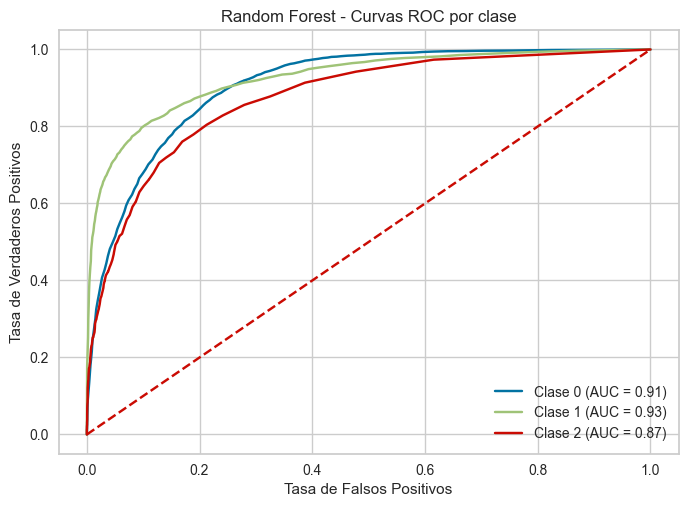

In [194]:
# Dividir de nuevo en conjuntos de prueba y test
df_prueba_limpio = df_left[df_left['is_test'] == 0].drop(columns=['is_test'])
df_test_limpio = df_left[df_left['is_test'] == 1].drop(columns=['is_test'])

df_prueba_limpio = df_prueba_limpio.drop(['date_recorded'], axis=1)
df_test_limpio=  df_test_limpio.drop(['date_recorded'], axis=1)
df_prueba_limpio=df_prueba_limpio.drop('recorded_by',axis=1)
df_test_limpio=  df_test_limpio.drop('recorded_by', axis=1)

# Cambio el ID a índice para utlizarlo como etiqueta y evitar que se use como variable explicativa del modelo.
df_prueba_limpio.set_index('id', inplace=True)

# Separar variable objetivo 'y' y variables predictoras 'X'
X = df_prueba_limpio.drop(['status_group'], axis=1)
y = df_prueba_limpio['status_group']

# Convertir las etiquetas de y para que empiecen desde 0.
y = y.astype(int) - 1

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el número de clases (asumiendo que es un problema de clasificación multiclase)
num_clases = len(np.unique(y))

# Entrenar y evaluar el modelo RandomForestClassifier con todas las variables.
classifier2 = RandomForestClassifier().fit(X_train, y_train)
pred2_proba = classifier2.predict_proba(X_test)
saca_metricas_multiclase(y_test, pred2_proba, num_clases, "Random Forest")


# Guardamos el 'id' antes de eliminarlo del DataFrame
ids = df_test_limpio['id']

df_test_limpio = df_test_limpio.drop(columns=['status_group'], errors='ignore')
# Eliminamos la columna 'id' del DataFrame antes de hacer predicciones
df_test_limpio = df_test_limpio.drop(columns=['id'])

# Realizamos las predicciones
predicciones_y = classifier2.predict(df_test_limpio)

# Mapeamos los valores predichos a las etiquetas correspondientes
etiquetas = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}
predicciones_y_mapeadas = [etiquetas[pred] for pred in predicciones_y]

# Creamos un nuevo DataFrame con las predicciones mapeadas, y ponemos el 'id' como índice
df_predicciones = pd.DataFrame(predicciones_y_mapeadas, columns=['status_group'], index=ids)

# Guardar el DataFrame en un archivo CSV
df_predicciones.to_csv('predicciones_mapeadasRandomForestsineliminarvariables.csv', index=True)

El score del modelo Random Forest realizando una limpieza de variables ha sido de 0.8084. No es para nada una mala predicción si tenemos en cuenta las predicciones de la página.Por otro lado, con el modelo xgboost, he conseguido una puntuación de 0.79, nada mala predicción pero me voy a quedar con el modelo Random Forest por tener mejores métricas. En general, en este tipo de concursos los modelos como el xgboost suelen presentar mejores calificaciones a la hora de predecir y por eso decidí probar con este modelo también. No obstante, en mi caso es mejor la opción del random forest. 

Tuve una dicotomía entre tener un modelo que predigese un poco mejor o un modelo más simplificado que tuviese una menor capacidad de predicción. El algoritmo Random forest funciona mejor con los parámetros base que cuando se modifican o se usan una menor cantidad de variables (aunque no sean especialmente significativas), perdía capacidad de predicción (0.8111 y 0.8084). No obstante, creo que si queremos hacer un modelo lo más adecuado a la realidad lo mejor va a ser quitar variables que no aporten mucho y que a la hora de explicar el modelo solo entorpezcan o sean redundantes por dar la misma información que otra variable.

El modelo muestra claros problemas al detectar el valor de la variable que era minoritaria. Con una capacidad de predicción y de detección de verdaderos positivos inferior a las otras dos clases. Como ya expresé en el apartado de justificación del no Balanceo, cuando hacía over-sampling y cuando hacía un under-sampling, en ambos casos, a pesar de conseguir una mayor predictivilidad en la clase minoritaria, el modelo era bastante menos potente. Es por ello que decidí no realizarlo. Y me quedé con un modelo con una capacidad bastante buena de predecir las dos clases mayoritarias y un poco más justo a la hora de predecir la minoritaria. 